### 데이터 전처리

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

cust_df = pd.read_csv("./train_santander.csv", encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [2]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [3]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [4]:
cust_df.describe( )

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [5]:
cust_df['var3'].value_counts()

 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 231           1
 188           1
 168           1
 135           1
 87            1
Name: var3, Length: 208, dtype: int64

In [6]:
# var3 피처 값 대체 및 ID 피처 드롭
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

# 피처 세트와 레이블 세트분리. 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))


피처 데이터 shape:(76020, 369)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [9]:
# X_train, y_train을 다시 학습과 검증 데이터 세트로 분리. 
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train,
                                                    test_size=0.3, random_state=0)

### XGBoost 모델 학습과 하이퍼 파라미터 튜닝

In [10]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, learning_rate 0.05, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정. 
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=0.05, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행. 
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.82179	validation_1-auc:0.80068
[1]	validation_0-auc:0.83092	validation_1-auc:0.80941
[2]	validation_0-auc:0.83207	validation_1-auc:0.80903
[3]	validation_0-auc:0.83288	validation_1-auc:0.80889
[4]	validation_0-auc:0.83414	validation_1-auc:0.80924
[5]	validation_0-auc:0.83524	validation_1-auc:0.80907
[6]	validation_0-auc:0.83568	validation_1-auc:0.81005
[7]	validation_0-auc:0.83741	validation_1-auc:0.81088
[8]	validation_0-auc:0.83896	validation_1-auc:0.81305
[9]	validation_0-auc:0.83949	validation_1-auc:0.81363
[10]	validation_0-auc:0.83908	validation_1-auc:0.81277
[11]	validation_0-auc:0.83913	validation_1-auc:0.81260
[12]	validation_0-auc:0.84009	validation_1-auc:0.81325
[13]	validation_0-auc:0.84081	validation_1-auc:0.81329
[14]	validation_0-auc:0.84196	validation_1-auc:0.81380
[15]	validation_0-auc:0.84394	validation_1-auc:0.81540
[16]	validation_0-auc:0.84414	validation_1-auc:0.81573
[17]	validation_0-auc:0.84437	validation_1-auc:0.81577
[18]	validation_0-au

[149]	validation_0-auc:0.90451	validation_1-auc:0.83346
[150]	validation_0-auc:0.90459	validation_1-auc:0.83343
[151]	validation_0-auc:0.90462	validation_1-auc:0.83344
[152]	validation_0-auc:0.90476	validation_1-auc:0.83342
[153]	validation_0-auc:0.90494	validation_1-auc:0.83339
[154]	validation_0-auc:0.90507	validation_1-auc:0.83336
[155]	validation_0-auc:0.90512	validation_1-auc:0.83334
[156]	validation_0-auc:0.90518	validation_1-auc:0.83331
[157]	validation_0-auc:0.90524	validation_1-auc:0.83339
[158]	validation_0-auc:0.90543	validation_1-auc:0.83330
[159]	validation_0-auc:0.90553	validation_1-auc:0.83331
[160]	validation_0-auc:0.90567	validation_1-auc:0.83342
[161]	validation_0-auc:0.90586	validation_1-auc:0.83339
[162]	validation_0-auc:0.90592	validation_1-auc:0.83340
[163]	validation_0-auc:0.90594	validation_1-auc:0.83340
[164]	validation_0-auc:0.90622	validation_1-auc:0.83337
[165]	validation_0-auc:0.90634	validation_1-auc:0.83333
[166]	validation_0-auc:0.90645	validation_1-auc:

In [11]:
from hyperopt import hp

# max_depth는 5에서 15까지 1간격으로, min_child_weight는 1에서 6까지 1간격으로
# colsample_bytree는 0.5에서 0.95사이, learning_rate는 0.01에서 0.2사이 정규 분포된 값으로 검색. 

xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 15, 1), 
                    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 0.95),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
}

In [15]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

# 목적 함수 설정. 
# 추후 fmin()에서 입력된 search_space값으로 XGBClassifier 교차 검증 학습 후 -1* roc_auc 평균 값을 반환.  
def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth'])
                           , min_child_weight=int(search_space['min_child_weight'])
                            , colsample_bytree=search_space['colsample_bytree']
                            , learning_rate=search_space['learning_rate']
                           )
    
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list= []
    
    # 3개 k-fold방식 적용 
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행.
        xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric='auc'
                   , eval_set=[(X_tr, y_tr), (X_val, y_val)])
    
        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음. 
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)
    
    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환. 
    return -1 * np.mean(roc_auc_list)

In [16]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출.
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trials, rstate=np.random.default_rng(seed=30))

print('best:', best)

[0]	validation_0-auc:0.81678	validation_1-auc:0.79160                                                                  
[1]	validation_0-auc:0.82454	validation_1-auc:0.79688                                                                  
[2]	validation_0-auc:0.83323	validation_1-auc:0.80572                                                                  
[3]	validation_0-auc:0.83854	validation_1-auc:0.81095                                                                  
[4]	validation_0-auc:0.83847	validation_1-auc:0.80989                                                                  
[5]	validation_0-auc:0.83879	validation_1-auc:0.80978                                                                  
[6]	validation_0-auc:0.84053	validation_1-auc:0.81042                                                                  
[7]	validation_0-auc:0.84129	validation_1-auc:0.81116                                                                  
[8]	validation_0-auc:0.84224	validation_

[68]	validation_0-auc:0.89247	validation_1-auc:0.83282                                                                 
[69]	validation_0-auc:0.89266	validation_1-auc:0.83292                                                                 
[70]	validation_0-auc:0.89306	validation_1-auc:0.83292                                                                 
[71]	validation_0-auc:0.89358	validation_1-auc:0.83264                                                                 
[72]	validation_0-auc:0.89402	validation_1-auc:0.83256                                                                 
[73]	validation_0-auc:0.89428	validation_1-auc:0.83239                                                                 
[74]	validation_0-auc:0.89455	validation_1-auc:0.83261                                                                 
[75]	validation_0-auc:0.89482	validation_1-auc:0.83233                                                                 
[76]	validation_0-auc:0.89494	validation

[46]	validation_0-auc:0.88227	validation_1-auc:0.83625                                                                 
[47]	validation_0-auc:0.88318	validation_1-auc:0.83603                                                                 
[48]	validation_0-auc:0.88406	validation_1-auc:0.83587                                                                 
[49]	validation_0-auc:0.88500	validation_1-auc:0.83567                                                                 
[50]	validation_0-auc:0.88567	validation_1-auc:0.83621                                                                 
[51]	validation_0-auc:0.88618	validation_1-auc:0.83640                                                                 
[52]	validation_0-auc:0.88687	validation_1-auc:0.83592                                                                 
[53]	validation_0-auc:0.88747	validation_1-auc:0.83641                                                                 
[54]	validation_0-auc:0.88845	validation

[14]	validation_0-auc:0.85451	validation_1-auc:0.82647                                                                 
[15]	validation_0-auc:0.85543	validation_1-auc:0.82596                                                                 
[16]	validation_0-auc:0.85660	validation_1-auc:0.82658                                                                 
[17]	validation_0-auc:0.85740	validation_1-auc:0.82710                                                                 
[18]	validation_0-auc:0.85886	validation_1-auc:0.82679                                                                 
[19]	validation_0-auc:0.85976	validation_1-auc:0.82722                                                                 
[20]	validation_0-auc:0.86042	validation_1-auc:0.82733                                                                 
[21]	validation_0-auc:0.86157	validation_1-auc:0.82861                                                                 
[22]	validation_0-auc:0.86180	validation

[82]	validation_0-auc:0.90021	validation_1-auc:0.83718                                                                 
[83]	validation_0-auc:0.90075	validation_1-auc:0.83709                                                                 
[84]	validation_0-auc:0.90107	validation_1-auc:0.83727                                                                 
[85]	validation_0-auc:0.90143	validation_1-auc:0.83751                                                                 
[86]	validation_0-auc:0.90158	validation_1-auc:0.83765                                                                 
[87]	validation_0-auc:0.90167	validation_1-auc:0.83763                                                                 
[88]	validation_0-auc:0.90173	validation_1-auc:0.83761                                                                 
[89]	validation_0-auc:0.90208	validation_1-auc:0.83762                                                                 
[90]	validation_0-auc:0.90247	validation

[50]	validation_0-auc:0.90265	validation_1-auc:0.83022                                                                 
[51]	validation_0-auc:0.90402	validation_1-auc:0.83032                                                                 
[52]	validation_0-auc:0.90437	validation_1-auc:0.83093                                                                 
[53]	validation_0-auc:0.90514	validation_1-auc:0.82994                                                                 
[54]	validation_0-auc:0.90563	validation_1-auc:0.82977                                                                 
[55]	validation_0-auc:0.90637	validation_1-auc:0.82996                                                                 
[56]	validation_0-auc:0.90670	validation_1-auc:0.82932                                                                 
[57]	validation_0-auc:0.90707	validation_1-auc:0.82900                                                                 
[58]	validation_0-auc:0.90802	validation

[36]	validation_0-auc:0.89004	validation_1-auc:0.82920                                                                 
[37]	validation_0-auc:0.89056	validation_1-auc:0.82864                                                                 
[38]	validation_0-auc:0.89098	validation_1-auc:0.82831                                                                 
[39]	validation_0-auc:0.89169	validation_1-auc:0.82861                                                                 
[40]	validation_0-auc:0.89308	validation_1-auc:0.82975                                                                 
[41]	validation_0-auc:0.89324	validation_1-auc:0.82911                                                                 
[42]	validation_0-auc:0.89554	validation_1-auc:0.82967                                                                 
[43]	validation_0-auc:0.89671	validation_1-auc:0.82997                                                                 
[44]	validation_0-auc:0.89801	validation

[4]	validation_0-auc:0.84851	validation_1-auc:0.81928                                                                  
[5]	validation_0-auc:0.85511	validation_1-auc:0.82100                                                                  
[6]	validation_0-auc:0.85611	validation_1-auc:0.82251                                                                  
[7]	validation_0-auc:0.85814	validation_1-auc:0.82231                                                                  
[8]	validation_0-auc:0.85953	validation_1-auc:0.82212                                                                  
[9]	validation_0-auc:0.86282	validation_1-auc:0.82205                                                                  
[10]	validation_0-auc:0.86284	validation_1-auc:0.82076                                                                 
[11]	validation_0-auc:0.86207	validation_1-auc:0.82028                                                                 
[12]	validation_0-auc:0.86463	validation

[72]	validation_0-auc:0.91846	validation_1-auc:0.83110                                                                 
[73]	validation_0-auc:0.91874	validation_1-auc:0.83085                                                                 
[74]	validation_0-auc:0.91944	validation_1-auc:0.83065                                                                 
[75]	validation_0-auc:0.91976	validation_1-auc:0.83107                                                                 
[76]	validation_0-auc:0.92022	validation_1-auc:0.83147                                                                 
[77]	validation_0-auc:0.92049	validation_1-auc:0.83143                                                                 
[78]	validation_0-auc:0.92081	validation_1-auc:0.83193                                                                 
[79]	validation_0-auc:0.92117	validation_1-auc:0.83232                                                                 
[80]	validation_0-auc:0.92192	validation

[40]	validation_0-auc:0.93486	validation_1-auc:0.82603                                                                 
[41]	validation_0-auc:0.93513	validation_1-auc:0.82577                                                                 
[42]	validation_0-auc:0.93574	validation_1-auc:0.82560                                                                 
[43]	validation_0-auc:0.93603	validation_1-auc:0.82574                                                                 
[44]	validation_0-auc:0.93697	validation_1-auc:0.82628                                                                 
[45]	validation_0-auc:0.93714	validation_1-auc:0.82631                                                                 
[46]	validation_0-auc:0.93738	validation_1-auc:0.82635                                                                 
[47]	validation_0-auc:0.93798	validation_1-auc:0.82599                                                                 
[48]	validation_0-auc:0.93835	validation

[50]	validation_0-auc:0.94066	validation_1-auc:0.83113                                                                 
[51]	validation_0-auc:0.94151	validation_1-auc:0.83151                                                                 
[52]	validation_0-auc:0.94212	validation_1-auc:0.83151                                                                 
[53]	validation_0-auc:0.94252	validation_1-auc:0.83139                                                                 
[54]	validation_0-auc:0.94318	validation_1-auc:0.83146                                                                 
[0]	validation_0-auc:0.83493	validation_1-auc:0.81063                                                                  
[1]	validation_0-auc:0.84197	validation_1-auc:0.81316                                                                  
[2]	validation_0-auc:0.85026	validation_1-auc:0.81739                                                                  
[3]	validation_0-auc:0.85484	validation_

[63]	validation_0-auc:0.94598	validation_1-auc:0.83211                                                                 
[64]	validation_0-auc:0.94598	validation_1-auc:0.83213                                                                 
[65]	validation_0-auc:0.94626	validation_1-auc:0.83215                                                                 
[66]	validation_0-auc:0.94647	validation_1-auc:0.83167                                                                 
[67]	validation_0-auc:0.94659	validation_1-auc:0.83147                                                                 
[68]	validation_0-auc:0.94664	validation_1-auc:0.83137                                                                 
[69]	validation_0-auc:0.94672	validation_1-auc:0.83122                                                                 
[70]	validation_0-auc:0.94741	validation_1-auc:0.83109                                                                 
[71]	validation_0-auc:0.94752	validation

[45]	validation_0-auc:0.89463	validation_1-auc:0.83043                                                                 
[46]	validation_0-auc:0.89489	validation_1-auc:0.83080                                                                 
[47]	validation_0-auc:0.89599	validation_1-auc:0.83056                                                                 
[48]	validation_0-auc:0.89665	validation_1-auc:0.83082                                                                 
[49]	validation_0-auc:0.89744	validation_1-auc:0.83093                                                                 
[50]	validation_0-auc:0.89782	validation_1-auc:0.83066                                                                 
[51]	validation_0-auc:0.89842	validation_1-auc:0.83060                                                                 
[52]	validation_0-auc:0.89949	validation_1-auc:0.83067                                                                 
[53]	validation_0-auc:0.90008	validation

[13]	validation_0-auc:0.86039	validation_1-auc:0.82427                                                                 
[14]	validation_0-auc:0.86126	validation_1-auc:0.82481                                                                 
[15]	validation_0-auc:0.86335	validation_1-auc:0.82649                                                                 
[16]	validation_0-auc:0.86505	validation_1-auc:0.82707                                                                 
[17]	validation_0-auc:0.86622	validation_1-auc:0.82740                                                                 
[18]	validation_0-auc:0.86591	validation_1-auc:0.82552                                                                 
[19]	validation_0-auc:0.86830	validation_1-auc:0.82661                                                                 
[20]	validation_0-auc:0.86984	validation_1-auc:0.82728                                                                 
[21]	validation_0-auc:0.86991	validation

[81]	validation_0-auc:0.91981	validation_1-auc:0.83005                                                                 
[0]	validation_0-auc:0.83132	validation_1-auc:0.81167                                                                  
[1]	validation_0-auc:0.83662	validation_1-auc:0.81285                                                                  
[2]	validation_0-auc:0.84048	validation_1-auc:0.81616                                                                  
[3]	validation_0-auc:0.84220	validation_1-auc:0.81680                                                                  
[4]	validation_0-auc:0.84545	validation_1-auc:0.81751                                                                  
[5]	validation_0-auc:0.85363	validation_1-auc:0.82067                                                                  
[6]	validation_0-auc:0.85464	validation_1-auc:0.82229                                                                  
[7]	validation_0-auc:0.85629	validation_

[67]	validation_0-auc:0.91212	validation_1-auc:0.82694                                                                 
[68]	validation_0-auc:0.91281	validation_1-auc:0.82720                                                                 
[69]	validation_0-auc:0.91357	validation_1-auc:0.82751                                                                 
[70]	validation_0-auc:0.91416	validation_1-auc:0.82789                                                                 
[71]	validation_0-auc:0.91463	validation_1-auc:0.82784                                                                 
[72]	validation_0-auc:0.91525	validation_1-auc:0.82798                                                                 
[73]	validation_0-auc:0.91600	validation_1-auc:0.82770                                                                 
[74]	validation_0-auc:0.91647	validation_1-auc:0.82711                                                                 
[75]	validation_0-auc:0.91721	validation

[48]	validation_0-auc:0.94993	validation_1-auc:0.82219                                                                 
[49]	validation_0-auc:0.95043	validation_1-auc:0.82191                                                                 
[50]	validation_0-auc:0.95059	validation_1-auc:0.82184                                                                 
[51]	validation_0-auc:0.95134	validation_1-auc:0.82163                                                                 
[52]	validation_0-auc:0.95164	validation_1-auc:0.82149                                                                 
[53]	validation_0-auc:0.95172	validation_1-auc:0.82083                                                                 
[54]	validation_0-auc:0.95253	validation_1-auc:0.82074                                                                 
[0]	validation_0-auc:0.82403	validation_1-auc:0.80542                                                                  
[1]	validation_0-auc:0.83752	validation_

[5]	validation_0-auc:0.86731	validation_1-auc:0.82281                                                                  
[6]	validation_0-auc:0.87105	validation_1-auc:0.82461                                                                  
[7]	validation_0-auc:0.87499	validation_1-auc:0.82682                                                                  
[8]	validation_0-auc:0.88082	validation_1-auc:0.82873                                                                  
[9]	validation_0-auc:0.88887	validation_1-auc:0.82957                                                                  
[10]	validation_0-auc:0.89139	validation_1-auc:0.82678                                                                 
[11]	validation_0-auc:0.89241	validation_1-auc:0.82558                                                                 
[12]	validation_0-auc:0.90053	validation_1-auc:0.82820                                                                 
[13]	validation_0-auc:0.90516	validation

[1]	validation_0-auc:0.82942	validation_1-auc:0.80498                                                                  
[2]	validation_0-auc:0.83477	validation_1-auc:0.80715                                                                  
[3]	validation_0-auc:0.83989	validation_1-auc:0.81232                                                                  
[4]	validation_0-auc:0.84115	validation_1-auc:0.81348                                                                  
[5]	validation_0-auc:0.84452	validation_1-auc:0.81346                                                                  
[6]	validation_0-auc:0.84443	validation_1-auc:0.81594                                                                  
[7]	validation_0-auc:0.84528	validation_1-auc:0.81614                                                                  
[8]	validation_0-auc:0.84627	validation_1-auc:0.81614                                                                  
[9]	validation_0-auc:0.84842	validation_

[69]	validation_0-auc:0.90053	validation_1-auc:0.83120                                                                 
[70]	validation_0-auc:0.90069	validation_1-auc:0.83097                                                                 
[71]	validation_0-auc:0.90078	validation_1-auc:0.83103                                                                 
[72]	validation_0-auc:0.90084	validation_1-auc:0.83093                                                                 
[73]	validation_0-auc:0.90119	validation_1-auc:0.83070                                                                 
[74]	validation_0-auc:0.90128	validation_1-auc:0.83063                                                                 
[75]	validation_0-auc:0.90186	validation_1-auc:0.83075                                                                 
[76]	validation_0-auc:0.90191	validation_1-auc:0.83074                                                                 
[77]	validation_0-auc:0.90202	validation

[57]	validation_0-auc:0.89776	validation_1-auc:0.83644                                                                 
[58]	validation_0-auc:0.89820	validation_1-auc:0.83676                                                                 
[59]	validation_0-auc:0.89873	validation_1-auc:0.83668                                                                 
[60]	validation_0-auc:0.89902	validation_1-auc:0.83703                                                                 
[61]	validation_0-auc:0.89948	validation_1-auc:0.83693                                                                 
[62]	validation_0-auc:0.89968	validation_1-auc:0.83691                                                                 
[63]	validation_0-auc:0.90008	validation_1-auc:0.83696                                                                 
[64]	validation_0-auc:0.90037	validation_1-auc:0.83683                                                                 
[65]	validation_0-auc:0.90061	validation

[35]	validation_0-auc:0.88276	validation_1-auc:0.83483                                                                 
[36]	validation_0-auc:0.88369	validation_1-auc:0.83404                                                                 
[37]	validation_0-auc:0.88448	validation_1-auc:0.83298                                                                 
[38]	validation_0-auc:0.88525	validation_1-auc:0.83292                                                                 
[39]	validation_0-auc:0.88643	validation_1-auc:0.83380                                                                 
[40]	validation_0-auc:0.88757	validation_1-auc:0.83466                                                                 
[41]	validation_0-auc:0.88796	validation_1-auc:0.83427                                                                 
[42]	validation_0-auc:0.88901	validation_1-auc:0.83478                                                                 
[43]	validation_0-auc:0.88973	validation

[3]	validation_0-auc:0.84179	validation_1-auc:0.81318                                                                  
[4]	validation_0-auc:0.84380	validation_1-auc:0.81329                                                                  
[5]	validation_0-auc:0.84851	validation_1-auc:0.81871                                                                  
[6]	validation_0-auc:0.84902	validation_1-auc:0.82071                                                                  
[7]	validation_0-auc:0.85059	validation_1-auc:0.82073                                                                  
[8]	validation_0-auc:0.85241	validation_1-auc:0.82129                                                                  
[9]	validation_0-auc:0.85349	validation_1-auc:0.82022                                                                  
[10]	validation_0-auc:0.85070	validation_1-auc:0.81705                                                                 
[11]	validation_0-auc:0.85182	validation

[71]	validation_0-auc:0.90687	validation_1-auc:0.82995                                                                 
[72]	validation_0-auc:0.90714	validation_1-auc:0.83011                                                                 
[73]	validation_0-auc:0.90727	validation_1-auc:0.83011                                                                 
[74]	validation_0-auc:0.90737	validation_1-auc:0.82986                                                                 
[75]	validation_0-auc:0.90794	validation_1-auc:0.82980                                                                 
[76]	validation_0-auc:0.90812	validation_1-auc:0.82983                                                                 
[77]	validation_0-auc:0.90823	validation_1-auc:0.82975                                                                 
[78]	validation_0-auc:0.90861	validation_1-auc:0.82948                                                                 
[79]	validation_0-auc:0.90943	validation

[59]	validation_0-auc:0.90568	validation_1-auc:0.83853                                                                 
[60]	validation_0-auc:0.90594	validation_1-auc:0.83851                                                                 
[61]	validation_0-auc:0.90630	validation_1-auc:0.83839                                                                 
[62]	validation_0-auc:0.90675	validation_1-auc:0.83827                                                                 
[63]	validation_0-auc:0.90683	validation_1-auc:0.83828                                                                 
[64]	validation_0-auc:0.90744	validation_1-auc:0.83807                                                                 
[65]	validation_0-auc:0.90781	validation_1-auc:0.83780                                                                 
[66]	validation_0-auc:0.90814	validation_1-auc:0.83783                                                                 
[67]	validation_0-auc:0.90836	validation

[41]	validation_0-auc:0.89607	validation_1-auc:0.83380                                                                 
[42]	validation_0-auc:0.89663	validation_1-auc:0.83407                                                                 
[43]	validation_0-auc:0.89735	validation_1-auc:0.83460                                                                 
[44]	validation_0-auc:0.89797	validation_1-auc:0.83521                                                                 
[45]	validation_0-auc:0.89841	validation_1-auc:0.83514                                                                 
[46]	validation_0-auc:0.89890	validation_1-auc:0.83532                                                                 
[47]	validation_0-auc:0.89941	validation_1-auc:0.83526                                                                 
[48]	validation_0-auc:0.90010	validation_1-auc:0.83522                                                                 
[49]	validation_0-auc:0.90072	validation

[21]	validation_0-auc:0.88680	validation_1-auc:0.82486                                                                 
[22]	validation_0-auc:0.88876	validation_1-auc:0.82493                                                                 
[23]	validation_0-auc:0.89089	validation_1-auc:0.82591                                                                 
[24]	validation_0-auc:0.89300	validation_1-auc:0.82668                                                                 
[25]	validation_0-auc:0.89373	validation_1-auc:0.82710                                                                 
[26]	validation_0-auc:0.89669	validation_1-auc:0.82749                                                                 
[27]	validation_0-auc:0.89894	validation_1-auc:0.82844                                                                 
[28]	validation_0-auc:0.90103	validation_1-auc:0.82852                                                                 
[29]	validation_0-auc:0.90213	validation

[5]	validation_0-auc:0.85006	validation_1-auc:0.82088                                                                  
[6]	validation_0-auc:0.85222	validation_1-auc:0.82112                                                                  
[7]	validation_0-auc:0.85523	validation_1-auc:0.82275                                                                  
[8]	validation_0-auc:0.85818	validation_1-auc:0.82406                                                                  
[9]	validation_0-auc:0.86445	validation_1-auc:0.82675                                                                  
[10]	validation_0-auc:0.86484	validation_1-auc:0.82553                                                                 
[11]	validation_0-auc:0.86506	validation_1-auc:0.82339                                                                 
[12]	validation_0-auc:0.86868	validation_1-auc:0.82634                                                                 
[13]	validation_0-auc:0.87168	validation

[73]	validation_0-auc:0.93892	validation_1-auc:0.83138                                                                 
[0]	validation_0-auc:0.83124	validation_1-auc:0.81038                                                                  
[1]	validation_0-auc:0.83818	validation_1-auc:0.81239                                                                  
[2]	validation_0-auc:0.84484	validation_1-auc:0.81708                                                                  
[3]	validation_0-auc:0.84677	validation_1-auc:0.81698                                                                  
[4]	validation_0-auc:0.84693	validation_1-auc:0.81728                                                                  
[5]	validation_0-auc:0.84854	validation_1-auc:0.81836                                                                  
[6]	validation_0-auc:0.85208	validation_1-auc:0.81890                                                                  
[7]	validation_0-auc:0.85396	validation_

[0]	validation_0-auc:0.81859	validation_1-auc:0.79401                                                                  
[1]	validation_0-auc:0.82667	validation_1-auc:0.79829                                                                  
[2]	validation_0-auc:0.83794	validation_1-auc:0.81041                                                                  
[3]	validation_0-auc:0.83969	validation_1-auc:0.81330                                                                  
[4]	validation_0-auc:0.84122	validation_1-auc:0.81361                                                                  
[5]	validation_0-auc:0.84405	validation_1-auc:0.81629                                                                  
[6]	validation_0-auc:0.84542	validation_1-auc:0.81610                                                                  
[7]	validation_0-auc:0.84682	validation_1-auc:0.81596                                                                  
[8]	validation_0-auc:0.84842	validation_

[68]	validation_0-auc:0.89895	validation_1-auc:0.83071                                                                 
[69]	validation_0-auc:0.89911	validation_1-auc:0.83059                                                                 
[70]	validation_0-auc:0.89951	validation_1-auc:0.83060                                                                 
[71]	validation_0-auc:0.89956	validation_1-auc:0.83056                                                                 
[72]	validation_0-auc:0.89979	validation_1-auc:0.83015                                                                 
[73]	validation_0-auc:0.90018	validation_1-auc:0.82998                                                                 
[74]	validation_0-auc:0.90061	validation_1-auc:0.83003                                                                 
[0]	validation_0-auc:0.81571	validation_1-auc:0.80310                                                                  
[1]	validation_0-auc:0.82505	validation_

[61]	validation_0-auc:0.89716	validation_1-auc:0.83723                                                                 
[62]	validation_0-auc:0.89745	validation_1-auc:0.83742                                                                 
[63]	validation_0-auc:0.89772	validation_1-auc:0.83729                                                                 
[64]	validation_0-auc:0.89795	validation_1-auc:0.83714                                                                 
[65]	validation_0-auc:0.89807	validation_1-auc:0.83728                                                                 
[66]	validation_0-auc:0.89850	validation_1-auc:0.83712                                                                 
[67]	validation_0-auc:0.89885	validation_1-auc:0.83715                                                                 
[68]	validation_0-auc:0.89917	validation_1-auc:0.83708                                                                 
[69]	validation_0-auc:0.89922	validation

[44]	validation_0-auc:0.89158	validation_1-auc:0.83713                                                                 
[45]	validation_0-auc:0.89192	validation_1-auc:0.83713                                                                 
[46]	validation_0-auc:0.89288	validation_1-auc:0.83699                                                                 
[47]	validation_0-auc:0.89299	validation_1-auc:0.83715                                                                 
[48]	validation_0-auc:0.89365	validation_1-auc:0.83693                                                                 
[49]	validation_0-auc:0.89450	validation_1-auc:0.83704                                                                 
[50]	validation_0-auc:0.89569	validation_1-auc:0.83689                                                                 
[51]	validation_0-auc:0.89596	validation_1-auc:0.83680                                                                 
[52]	validation_0-auc:0.89627	validation

[35]	validation_0-auc:0.94256	validation_1-auc:0.82556                                                                 
[36]	validation_0-auc:0.94344	validation_1-auc:0.82498                                                                 
[37]	validation_0-auc:0.94385	validation_1-auc:0.82548                                                                 
[38]	validation_0-auc:0.94448	validation_1-auc:0.82520                                                                 
[39]	validation_0-auc:0.94490	validation_1-auc:0.82483                                                                 
[40]	validation_0-auc:0.94524	validation_1-auc:0.82489                                                                 
[41]	validation_0-auc:0.94575	validation_1-auc:0.82463                                                                 
[42]	validation_0-auc:0.94658	validation_1-auc:0.82458                                                                 
[43]	validation_0-auc:0.94681	validation

[42]	validation_0-auc:0.95009	validation_1-auc:0.83030                                                                 
[43]	validation_0-auc:0.95097	validation_1-auc:0.82986                                                                 
[44]	validation_0-auc:0.95125	validation_1-auc:0.83005                                                                 
[45]	validation_0-auc:0.95192	validation_1-auc:0.82991                                                                 
[46]	validation_0-auc:0.95229	validation_1-auc:0.82992                                                                 
[47]	validation_0-auc:0.95271	validation_1-auc:0.82983                                                                 
[48]	validation_0-auc:0.95292	validation_1-auc:0.82995                                                                 
[49]	validation_0-auc:0.95401	validation_1-auc:0.82973                                                                 
[50]	validation_0-auc:0.95415	validation

[11]	validation_0-auc:0.85423	validation_1-auc:0.80915                                                                 
[12]	validation_0-auc:0.85498	validation_1-auc:0.80991                                                                 
[13]	validation_0-auc:0.85720	validation_1-auc:0.81190                                                                 
[14]	validation_0-auc:0.85926	validation_1-auc:0.81424                                                                 
[15]	validation_0-auc:0.86045	validation_1-auc:0.81530                                                                 
[16]	validation_0-auc:0.86229	validation_1-auc:0.81601                                                                 
[17]	validation_0-auc:0.86371	validation_1-auc:0.81651                                                                 
[18]	validation_0-auc:0.86226	validation_1-auc:0.81396                                                                 
[19]	validation_0-auc:0.86398	validation

[79]	validation_0-auc:0.91349	validation_1-auc:0.82965                                                                 
[80]	validation_0-auc:0.91469	validation_1-auc:0.83016                                                                 
[81]	validation_0-auc:0.91517	validation_1-auc:0.83010                                                                 
[82]	validation_0-auc:0.91534	validation_1-auc:0.83032                                                                 
[83]	validation_0-auc:0.91610	validation_1-auc:0.82989                                                                 
[84]	validation_0-auc:0.91679	validation_1-auc:0.83016                                                                 
[85]	validation_0-auc:0.91713	validation_1-auc:0.83017                                                                 
[86]	validation_0-auc:0.91799	validation_1-auc:0.83025                                                                 
[87]	validation_0-auc:0.91859	validation

[47]	validation_0-auc:0.88986	validation_1-auc:0.82850                                                                 
[48]	validation_0-auc:0.89065	validation_1-auc:0.82893                                                                 
[49]	validation_0-auc:0.89157	validation_1-auc:0.82893                                                                 
[50]	validation_0-auc:0.89204	validation_1-auc:0.82891                                                                 
[51]	validation_0-auc:0.89292	validation_1-auc:0.82961                                                                 
[52]	validation_0-auc:0.89406	validation_1-auc:0.82954                                                                 
[53]	validation_0-auc:0.89504	validation_1-auc:0.82992                                                                 
[54]	validation_0-auc:0.89573	validation_1-auc:0.82952                                                                 
[55]	validation_0-auc:0.89690	validation

[24]	validation_0-auc:0.87370	validation_1-auc:0.82543                                                                 
[25]	validation_0-auc:0.87467	validation_1-auc:0.82545                                                                 
[26]	validation_0-auc:0.87657	validation_1-auc:0.82557                                                                 
[27]	validation_0-auc:0.87737	validation_1-auc:0.82611                                                                 
[28]	validation_0-auc:0.87797	validation_1-auc:0.82594                                                                 
[29]	validation_0-auc:0.87860	validation_1-auc:0.82586                                                                 
[30]	validation_0-auc:0.88080	validation_1-auc:0.82598                                                                 
[31]	validation_0-auc:0.88140	validation_1-auc:0.82569                                                                 
[32]	validation_0-auc:0.88177	validation

[5]	validation_0-auc:0.86638	validation_1-auc:0.81160                                                                  
[6]	validation_0-auc:0.87146	validation_1-auc:0.81177                                                                  
[7]	validation_0-auc:0.87577	validation_1-auc:0.81297                                                                  
[8]	validation_0-auc:0.88057	validation_1-auc:0.81567                                                                  
[9]	validation_0-auc:0.89048	validation_1-auc:0.81748                                                                  
[10]	validation_0-auc:0.89156	validation_1-auc:0.81742                                                                 
[11]	validation_0-auc:0.89801	validation_1-auc:0.81747                                                                 
[12]	validation_0-auc:0.90455	validation_1-auc:0.81902                                                                 
[13]	validation_0-auc:0.90869	validation

[21]	validation_0-auc:0.93471	validation_1-auc:0.82381                                                                 
[22]	validation_0-auc:0.93700	validation_1-auc:0.82280                                                                 
[23]	validation_0-auc:0.94025	validation_1-auc:0.82151                                                                 
[24]	validation_0-auc:0.94223	validation_1-auc:0.82055                                                                 
[25]	validation_0-auc:0.94432	validation_1-auc:0.82081                                                                 
[26]	validation_0-auc:0.94626	validation_1-auc:0.82019                                                                 
[27]	validation_0-auc:0.94790	validation_1-auc:0.82071                                                                 
[28]	validation_0-auc:0.94951	validation_1-auc:0.82001                                                                 
[29]	validation_0-auc:0.95165	validation

[50]	validation_0-auc:0.96699	validation_1-auc:0.82434                                                                 
[51]	validation_0-auc:0.96708	validation_1-auc:0.82411                                                                 
[52]	validation_0-auc:0.96730	validation_1-auc:0.82403                                                                 
[53]	validation_0-auc:0.96750	validation_1-auc:0.82379                                                                 
[54]	validation_0-auc:0.96765	validation_1-auc:0.82402                                                                 
[55]	validation_0-auc:0.96829	validation_1-auc:0.82401                                                                 
[56]	validation_0-auc:0.96835	validation_1-auc:0.82383                                                                 
[57]	validation_0-auc:0.96884	validation_1-auc:0.82358                                                                 
[58]	validation_0-auc:0.96898	validation

[59]	validation_0-auc:0.87573	validation_1-auc:0.83013                                                                 
[60]	validation_0-auc:0.87628	validation_1-auc:0.82956                                                                 
[61]	validation_0-auc:0.87674	validation_1-auc:0.82914                                                                 
[62]	validation_0-auc:0.87690	validation_1-auc:0.82875                                                                 
[63]	validation_0-auc:0.87694	validation_1-auc:0.82873                                                                 
[64]	validation_0-auc:0.87761	validation_1-auc:0.82944                                                                 
[65]	validation_0-auc:0.87840	validation_1-auc:0.82977                                                                 
[66]	validation_0-auc:0.87835	validation_1-auc:0.82907                                                                 
[67]	validation_0-auc:0.87885	validation

[27]	validation_0-auc:0.86048	validation_1-auc:0.82912                                                                 
[28]	validation_0-auc:0.86093	validation_1-auc:0.82992                                                                 
[29]	validation_0-auc:0.86185	validation_1-auc:0.82979                                                                 
[30]	validation_0-auc:0.86265	validation_1-auc:0.82914                                                                 
[31]	validation_0-auc:0.86379	validation_1-auc:0.82893                                                                 
[32]	validation_0-auc:0.86425	validation_1-auc:0.82914                                                                 
[33]	validation_0-auc:0.86457	validation_1-auc:0.82930                                                                 
[34]	validation_0-auc:0.86517	validation_1-auc:0.82955                                                                 
[35]	validation_0-auc:0.86613	validation

[14]	validation_0-auc:0.85606	validation_1-auc:0.82551                                                                 
[15]	validation_0-auc:0.85657	validation_1-auc:0.82514                                                                 
[16]	validation_0-auc:0.85726	validation_1-auc:0.82542                                                                 
[17]	validation_0-auc:0.85790	validation_1-auc:0.82533                                                                 
[18]	validation_0-auc:0.85791	validation_1-auc:0.82525                                                                 
[19]	validation_0-auc:0.85835	validation_1-auc:0.82524                                                                 
[20]	validation_0-auc:0.85862	validation_1-auc:0.82514                                                                 
[21]	validation_0-auc:0.85962	validation_1-auc:0.82506                                                                 
[22]	validation_0-auc:0.86052	validation

[82]	validation_0-auc:0.88719	validation_1-auc:0.83153                                                                 
[83]	validation_0-auc:0.88753	validation_1-auc:0.83141                                                                 
[84]	validation_0-auc:0.88775	validation_1-auc:0.83124                                                                 
[85]	validation_0-auc:0.88876	validation_1-auc:0.83164                                                                 
[86]	validation_0-auc:0.88932	validation_1-auc:0.83185                                                                 
[87]	validation_0-auc:0.88984	validation_1-auc:0.83208                                                                 
[88]	validation_0-auc:0.88988	validation_1-auc:0.83198                                                                 
[89]	validation_0-auc:0.89038	validation_1-auc:0.83186                                                                 
[90]	validation_0-auc:0.89056	validation

[50]	validation_0-auc:0.90056	validation_1-auc:0.82689                                                                 
[51]	validation_0-auc:0.90153	validation_1-auc:0.82689                                                                 
[52]	validation_0-auc:0.90247	validation_1-auc:0.82740                                                                 
[53]	validation_0-auc:0.90282	validation_1-auc:0.82758                                                                 
[54]	validation_0-auc:0.90402	validation_1-auc:0.82809                                                                 
[55]	validation_0-auc:0.90484	validation_1-auc:0.82826                                                                 
[56]	validation_0-auc:0.90551	validation_1-auc:0.82878                                                                 
[57]	validation_0-auc:0.90676	validation_1-auc:0.82909                                                                 
[58]	validation_0-auc:0.90760	validation

[18]	validation_0-auc:0.87017	validation_1-auc:0.82680                                                                 
[19]	validation_0-auc:0.87129	validation_1-auc:0.82759                                                                 
[20]	validation_0-auc:0.87258	validation_1-auc:0.82770                                                                 
[21]	validation_0-auc:0.87327	validation_1-auc:0.82764                                                                 
[22]	validation_0-auc:0.87413	validation_1-auc:0.82809                                                                 
[23]	validation_0-auc:0.87543	validation_1-auc:0.82841                                                                 
[24]	validation_0-auc:0.87606	validation_1-auc:0.82870                                                                 
[25]	validation_0-auc:0.87866	validation_1-auc:0.82844                                                                 
[26]	validation_0-auc:0.87953	validation

[86]	validation_0-auc:0.93099	validation_1-auc:0.83147                                                                 
[87]	validation_0-auc:0.93149	validation_1-auc:0.83157                                                                 
[88]	validation_0-auc:0.93206	validation_1-auc:0.83172                                                                 
[89]	validation_0-auc:0.93264	validation_1-auc:0.83163                                                                 
[90]	validation_0-auc:0.93309	validation_1-auc:0.83166                                                                 
[91]	validation_0-auc:0.93367	validation_1-auc:0.83196                                                                 
[0]	validation_0-auc:0.83623	validation_1-auc:0.80838                                                                  
[1]	validation_0-auc:0.83890	validation_1-auc:0.80926                                                                  
[2]	validation_0-auc:0.84444	validation_

[62]	validation_0-auc:0.91726	validation_1-auc:0.83086                                                                 
[63]	validation_0-auc:0.91844	validation_1-auc:0.83112                                                                 
[64]	validation_0-auc:0.91926	validation_1-auc:0.83094                                                                 
[65]	validation_0-auc:0.92009	validation_1-auc:0.83100                                                                 
[66]	validation_0-auc:0.92102	validation_1-auc:0.83101                                                                 
[67]	validation_0-auc:0.92158	validation_1-auc:0.83111                                                                 
[68]	validation_0-auc:0.92249	validation_1-auc:0.83103                                                                 
[69]	validation_0-auc:0.92342	validation_1-auc:0.83147                                                                 
[70]	validation_0-auc:0.92422	validation

[30]	validation_0-auc:0.86359	validation_1-auc:0.82757                                                                 
[31]	validation_0-auc:0.86469	validation_1-auc:0.82797                                                                 
[32]	validation_0-auc:0.86523	validation_1-auc:0.82842                                                                 
[33]	validation_0-auc:0.86630	validation_1-auc:0.82908                                                                 
[34]	validation_0-auc:0.86680	validation_1-auc:0.82890                                                                 
[35]	validation_0-auc:0.86758	validation_1-auc:0.82920                                                                 
[36]	validation_0-auc:0.86819	validation_1-auc:0.82920                                                                 
[37]	validation_0-auc:0.86835	validation_1-auc:0.82955                                                                 
[38]	validation_0-auc:0.86891	validation

[2]	validation_0-auc:0.83016	validation_1-auc:0.81754                                                                  
[3]	validation_0-auc:0.83108	validation_1-auc:0.82032                                                                  
[4]	validation_0-auc:0.83544	validation_1-auc:0.81911                                                                  
[5]	validation_0-auc:0.83613	validation_1-auc:0.81869                                                                  
[6]	validation_0-auc:0.83830	validation_1-auc:0.82075                                                                  
[7]	validation_0-auc:0.83944	validation_1-auc:0.82322                                                                  
[8]	validation_0-auc:0.83999	validation_1-auc:0.82182                                                                  
[9]	validation_0-auc:0.84429	validation_1-auc:0.82526                                                                  
[10]	validation_0-auc:0.84432	validation

[70]	validation_0-auc:0.88324	validation_1-auc:0.83818                                                                 
[71]	validation_0-auc:0.88365	validation_1-auc:0.83814                                                                 
[72]	validation_0-auc:0.88373	validation_1-auc:0.83817                                                                 
[73]	validation_0-auc:0.88433	validation_1-auc:0.83802                                                                 
[74]	validation_0-auc:0.88466	validation_1-auc:0.83799                                                                 
[75]	validation_0-auc:0.88472	validation_1-auc:0.83796                                                                 
[76]	validation_0-auc:0.88499	validation_1-auc:0.83804                                                                 
[77]	validation_0-auc:0.88517	validation_1-auc:0.83800                                                                 
[78]	validation_0-auc:0.88523	validation

[38]	validation_0-auc:0.86866	validation_1-auc:0.83400                                                                 
[39]	validation_0-auc:0.86867	validation_1-auc:0.83430                                                                 
[40]	validation_0-auc:0.86958	validation_1-auc:0.83457                                                                 
[41]	validation_0-auc:0.87034	validation_1-auc:0.83442                                                                 
[42]	validation_0-auc:0.87080	validation_1-auc:0.83476                                                                 
[43]	validation_0-auc:0.87121	validation_1-auc:0.83497                                                                 
[44]	validation_0-auc:0.87176	validation_1-auc:0.83505                                                                 
[45]	validation_0-auc:0.87236	validation_1-auc:0.83576                                                                 
[46]	validation_0-auc:0.87289	validation

[22]	validation_0-auc:0.91955	validation_1-auc:0.82383                                                                 
[23]	validation_0-auc:0.92402	validation_1-auc:0.82440                                                                 
[24]	validation_0-auc:0.92640	validation_1-auc:0.82513                                                                 
[25]	validation_0-auc:0.92778	validation_1-auc:0.82570                                                                 
[26]	validation_0-auc:0.92970	validation_1-auc:0.82481                                                                 
[27]	validation_0-auc:0.93228	validation_1-auc:0.82590                                                                 
[28]	validation_0-auc:0.93256	validation_1-auc:0.82523                                                                 
[29]	validation_0-auc:0.93407	validation_1-auc:0.82633                                                                 
[30]	validation_0-auc:0.93545	validation

[31]	validation_0-auc:0.94051	validation_1-auc:0.82648                                                                 
[32]	validation_0-auc:0.94207	validation_1-auc:0.82636                                                                 
[33]	validation_0-auc:0.94266	validation_1-auc:0.82776                                                                 
[34]	validation_0-auc:0.94386	validation_1-auc:0.82823                                                                 
[35]	validation_0-auc:0.94535	validation_1-auc:0.82805                                                                 
[36]	validation_0-auc:0.94674	validation_1-auc:0.82768                                                                 
[37]	validation_0-auc:0.94812	validation_1-auc:0.82681                                                                 
[38]	validation_0-auc:0.94914	validation_1-auc:0.82728                                                                 
[39]	validation_0-auc:0.94970	validation

[21]	validation_0-auc:0.91961	validation_1-auc:0.82488                                                                 
[22]	validation_0-auc:0.92191	validation_1-auc:0.82592                                                                 
[23]	validation_0-auc:0.92552	validation_1-auc:0.82719                                                                 
[24]	validation_0-auc:0.92724	validation_1-auc:0.82690                                                                 
[25]	validation_0-auc:0.92770	validation_1-auc:0.82807                                                                 
[26]	validation_0-auc:0.93022	validation_1-auc:0.82652                                                                 
[27]	validation_0-auc:0.93325	validation_1-auc:0.82663                                                                 
[28]	validation_0-auc:0.93402	validation_1-auc:0.82599                                                                 
[29]	validation_0-auc:0.93614	validation

[12]	validation_0-auc:0.85112	validation_1-auc:0.82109                                                                 
[13]	validation_0-auc:0.85241	validation_1-auc:0.82187                                                                 
[14]	validation_0-auc:0.85435	validation_1-auc:0.82329                                                                 
[15]	validation_0-auc:0.85577	validation_1-auc:0.82479                                                                 
[16]	validation_0-auc:0.85759	validation_1-auc:0.82616                                                                 
[17]	validation_0-auc:0.85901	validation_1-auc:0.82558                                                                 
[18]	validation_0-auc:0.85867	validation_1-auc:0.82334                                                                 
[19]	validation_0-auc:0.86031	validation_1-auc:0.82503                                                                 
[20]	validation_0-auc:0.86179	validation

[80]	validation_0-auc:0.89948	validation_1-auc:0.83246                                                                 
[81]	validation_0-auc:0.89971	validation_1-auc:0.83255                                                                 
[82]	validation_0-auc:0.90003	validation_1-auc:0.83254                                                                 
[83]	validation_0-auc:0.90043	validation_1-auc:0.83260                                                                 
[84]	validation_0-auc:0.90045	validation_1-auc:0.83266                                                                 
[0]	validation_0-auc:0.81813	validation_1-auc:0.80285                                                                  
[1]	validation_0-auc:0.82354	validation_1-auc:0.80794                                                                  
[2]	validation_0-auc:0.83438	validation_1-auc:0.81953                                                                  
[3]	validation_0-auc:0.83530	validation_

[63]	validation_0-auc:0.89585	validation_1-auc:0.83663                                                                 
[64]	validation_0-auc:0.89599	validation_1-auc:0.83648                                                                 
[65]	validation_0-auc:0.89624	validation_1-auc:0.83662                                                                 
[66]	validation_0-auc:0.89647	validation_1-auc:0.83653                                                                 
[67]	validation_0-auc:0.89656	validation_1-auc:0.83653                                                                 
[68]	validation_0-auc:0.89672	validation_1-auc:0.83669                                                                 
[69]	validation_0-auc:0.89689	validation_1-auc:0.83669                                                                 
[70]	validation_0-auc:0.89735	validation_1-auc:0.83663                                                                 
[71]	validation_0-auc:0.89791	validation

[31]	validation_0-auc:0.87580	validation_1-auc:0.83197                                                                 
[32]	validation_0-auc:0.87612	validation_1-auc:0.83187                                                                 
[33]	validation_0-auc:0.87661	validation_1-auc:0.83228                                                                 
[34]	validation_0-auc:0.87803	validation_1-auc:0.83312                                                                 
[35]	validation_0-auc:0.87895	validation_1-auc:0.83342                                                                 
[36]	validation_0-auc:0.87974	validation_1-auc:0.83332                                                                 
[37]	validation_0-auc:0.88051	validation_1-auc:0.83352                                                                 
[38]	validation_0-auc:0.88164	validation_1-auc:0.83408                                                                 
[39]	validation_0-auc:0.88255	validation

[99]	validation_0-auc:0.90749	validation_1-auc:0.83699                                                                 
[0]	validation_0-auc:0.83007	validation_1-auc:0.80090                                                                  
[1]	validation_0-auc:0.83903	validation_1-auc:0.80474                                                                  
[2]	validation_0-auc:0.84815	validation_1-auc:0.80742                                                                  
[3]	validation_0-auc:0.85318	validation_1-auc:0.80811                                                                  
[4]	validation_0-auc:0.85865	validation_1-auc:0.81063                                                                  
[5]	validation_0-auc:0.86027	validation_1-auc:0.81129                                                                  
[6]	validation_0-auc:0.86264	validation_1-auc:0.81163                                                                  
[7]	validation_0-auc:0.86569	validation_

[10]	validation_0-auc:0.88234	validation_1-auc:0.82337                                                                 
[11]	validation_0-auc:0.88557	validation_1-auc:0.82610                                                                 
[12]	validation_0-auc:0.89018	validation_1-auc:0.82673                                                                 
[13]	validation_0-auc:0.89294	validation_1-auc:0.82822                                                                 
[14]	validation_0-auc:0.89599	validation_1-auc:0.82857                                                                 
[15]	validation_0-auc:0.90119	validation_1-auc:0.82900                                                                 
[16]	validation_0-auc:0.90445	validation_1-auc:0.82829                                                                 
[17]	validation_0-auc:0.90742	validation_1-auc:0.82764                                                                 
[18]	validation_0-auc:0.90861	validation

[20]	validation_0-auc:0.91240	validation_1-auc:0.82410                                                                 
[21]	validation_0-auc:0.91543	validation_1-auc:0.82551                                                                 
[22]	validation_0-auc:0.91837	validation_1-auc:0.82646                                                                 
[23]	validation_0-auc:0.92145	validation_1-auc:0.82662                                                                 
[24]	validation_0-auc:0.92418	validation_1-auc:0.82592                                                                 
[25]	validation_0-auc:0.92652	validation_1-auc:0.82548                                                                 
[26]	validation_0-auc:0.92873	validation_1-auc:0.82582                                                                 
[27]	validation_0-auc:0.93080	validation_1-auc:0.82535                                                                 
[28]	validation_0-auc:0.93312	validation

[25]	validation_0-auc:0.88480	validation_1-auc:0.82516                                                                 
[26]	validation_0-auc:0.88655	validation_1-auc:0.82510                                                                 
[27]	validation_0-auc:0.88802	validation_1-auc:0.82477                                                                 
[28]	validation_0-auc:0.88883	validation_1-auc:0.82479                                                                 
[29]	validation_0-auc:0.89090	validation_1-auc:0.82525                                                                 
[30]	validation_0-auc:0.89287	validation_1-auc:0.82503                                                                 
[31]	validation_0-auc:0.89454	validation_1-auc:0.82571                                                                 
[32]	validation_0-auc:0.89573	validation_1-auc:0.82562                                                                 
[33]	validation_0-auc:0.89647	validation

[4]	validation_0-auc:0.84579	validation_1-auc:0.82141                                                                  
[5]	validation_0-auc:0.84896	validation_1-auc:0.82209                                                                  
[6]	validation_0-auc:0.85148	validation_1-auc:0.82071                                                                  
[7]	validation_0-auc:0.85280	validation_1-auc:0.82098                                                                  
[8]	validation_0-auc:0.85453	validation_1-auc:0.82155                                                                  
[9]	validation_0-auc:0.86231	validation_1-auc:0.82435                                                                  
[10]	validation_0-auc:0.86241	validation_1-auc:0.82294                                                                 
[11]	validation_0-auc:0.86448	validation_1-auc:0.82542                                                                 
[12]	validation_0-auc:0.86603	validation

[72]	validation_0-auc:0.93838	validation_1-auc:0.82933                                                                 
[0]	validation_0-auc:0.83623	validation_1-auc:0.80838                                                                  
[1]	validation_0-auc:0.83938	validation_1-auc:0.80897                                                                  
[2]	validation_0-auc:0.84517	validation_1-auc:0.81405                                                                  
[3]	validation_0-auc:0.84627	validation_1-auc:0.81336                                                                  
[4]	validation_0-auc:0.85037	validation_1-auc:0.81455                                                                  
[5]	validation_0-auc:0.85190	validation_1-auc:0.81394                                                                  
[6]	validation_0-auc:0.85349	validation_1-auc:0.81383                                                                  
[7]	validation_0-auc:0.85576	validation_

[1]	validation_0-auc:0.82957	validation_1-auc:0.80477                                                                  
[2]	validation_0-auc:0.83576	validation_1-auc:0.80698                                                                  
[3]	validation_0-auc:0.83833	validation_1-auc:0.80872                                                                  
[4]	validation_0-auc:0.84034	validation_1-auc:0.81074                                                                  
[5]	validation_0-auc:0.84422	validation_1-auc:0.81386                                                                  
[6]	validation_0-auc:0.84652	validation_1-auc:0.81442                                                                  
[7]	validation_0-auc:0.84738	validation_1-auc:0.81464                                                                  
[8]	validation_0-auc:0.85035	validation_1-auc:0.81722                                                                  
[9]	validation_0-auc:0.85274	validation_

[69]	validation_0-auc:0.89683	validation_1-auc:0.83322                                                                 
[70]	validation_0-auc:0.89700	validation_1-auc:0.83335                                                                 
[71]	validation_0-auc:0.89723	validation_1-auc:0.83332                                                                 
[72]	validation_0-auc:0.89762	validation_1-auc:0.83321                                                                 
[73]	validation_0-auc:0.89824	validation_1-auc:0.83298                                                                 
[74]	validation_0-auc:0.89856	validation_1-auc:0.83278                                                                 
[75]	validation_0-auc:0.89900	validation_1-auc:0.83269                                                                 
[76]	validation_0-auc:0.89938	validation_1-auc:0.83291                                                                 
[77]	validation_0-auc:0.89945	validation

[54]	validation_0-auc:0.89111	validation_1-auc:0.83824                                                                 
[55]	validation_0-auc:0.89186	validation_1-auc:0.83798                                                                 
[56]	validation_0-auc:0.89201	validation_1-auc:0.83802                                                                 
[57]	validation_0-auc:0.89291	validation_1-auc:0.83799                                                                 
[58]	validation_0-auc:0.89337	validation_1-auc:0.83779                                                                 
[59]	validation_0-auc:0.89367	validation_1-auc:0.83772                                                                 
[60]	validation_0-auc:0.89405	validation_1-auc:0.83775                                                                 
[61]	validation_0-auc:0.89483	validation_1-auc:0.83746                                                                 
[62]	validation_0-auc:0.89514	validation

[37]	validation_0-auc:0.88258	validation_1-auc:0.83665                                                                 
[38]	validation_0-auc:0.88358	validation_1-auc:0.83676                                                                 
[39]	validation_0-auc:0.88387	validation_1-auc:0.83681                                                                 
[40]	validation_0-auc:0.88465	validation_1-auc:0.83704                                                                 
[41]	validation_0-auc:0.88530	validation_1-auc:0.83683                                                                 
[42]	validation_0-auc:0.88641	validation_1-auc:0.83711                                                                 
[43]	validation_0-auc:0.88702	validation_1-auc:0.83748                                                                 
[44]	validation_0-auc:0.88749	validation_1-auc:0.83771                                                                 
[45]	validation_0-auc:0.88816	validation

[5]	validation_0-auc:0.84915	validation_1-auc:0.81515                                                                  
[6]	validation_0-auc:0.85075	validation_1-auc:0.81600                                                                  
[7]	validation_0-auc:0.85201	validation_1-auc:0.81644                                                                  
[8]	validation_0-auc:0.85316	validation_1-auc:0.81744                                                                  
[9]	validation_0-auc:0.85926	validation_1-auc:0.82166                                                                  
[10]	validation_0-auc:0.85969	validation_1-auc:0.82186                                                                 
[11]	validation_0-auc:0.85992	validation_1-auc:0.82015                                                                 
[12]	validation_0-auc:0.86386	validation_1-auc:0.82287                                                                 
[13]	validation_0-auc:0.86655	validation

[13]	validation_0-auc:0.86982	validation_1-auc:0.83005                                                                 
[14]	validation_0-auc:0.87291	validation_1-auc:0.83106                                                                 
[15]	validation_0-auc:0.87564	validation_1-auc:0.83181                                                                 
[16]	validation_0-auc:0.87728	validation_1-auc:0.83268                                                                 
[17]	validation_0-auc:0.87857	validation_1-auc:0.83300                                                                 
[18]	validation_0-auc:0.87835	validation_1-auc:0.83286                                                                 
[19]	validation_0-auc:0.87947	validation_1-auc:0.83265                                                                 
[20]	validation_0-auc:0.88050	validation_1-auc:0.83271                                                                 
[21]	validation_0-auc:0.88137	validation

[1]	validation_0-auc:0.83414	validation_1-auc:0.81420                                                                  
[2]	validation_0-auc:0.83944	validation_1-auc:0.82038                                                                  
[3]	validation_0-auc:0.84088	validation_1-auc:0.81902                                                                  
[4]	validation_0-auc:0.84366	validation_1-auc:0.82039                                                                  
[5]	validation_0-auc:0.84774	validation_1-auc:0.82458                                                                  
[6]	validation_0-auc:0.84873	validation_1-auc:0.82425                                                                  
[7]	validation_0-auc:0.85042	validation_1-auc:0.82462                                                                  
[8]	validation_0-auc:0.85220	validation_1-auc:0.82550                                                                  
[9]	validation_0-auc:0.85986	validation_

[69]	validation_0-auc:0.91240	validation_1-auc:0.83499                                                                 
[70]	validation_0-auc:0.91255	validation_1-auc:0.83474                                                                 
[71]	validation_0-auc:0.91298	validation_1-auc:0.83461                                                                 
[72]	validation_0-auc:0.91325	validation_1-auc:0.83439                                                                 
[73]	validation_0-auc:0.91340	validation_1-auc:0.83429                                                                 
[74]	validation_0-auc:0.91360	validation_1-auc:0.83412                                                                 
[75]	validation_0-auc:0.91377	validation_1-auc:0.83413                                                                 
[76]	validation_0-auc:0.91388	validation_1-auc:0.83407                                                                 
[77]	validation_0-auc:0.91406	validation

[54]	validation_0-auc:0.84010	validation_1-auc:0.81741                                                                 
[55]	validation_0-auc:0.84042	validation_1-auc:0.81734                                                                 
[56]	validation_0-auc:0.84078	validation_1-auc:0.81725                                                                 
[57]	validation_0-auc:0.84104	validation_1-auc:0.81742                                                                 
[58]	validation_0-auc:0.84120	validation_1-auc:0.81744                                                                 
[59]	validation_0-auc:0.84133	validation_1-auc:0.81736                                                                 
[60]	validation_0-auc:0.84145	validation_1-auc:0.81756                                                                 
[61]	validation_0-auc:0.84147	validation_1-auc:0.81750                                                                 
[62]	validation_0-auc:0.84172	validation

[22]	validation_0-auc:0.83288	validation_1-auc:0.82152                                                                 
[23]	validation_0-auc:0.83240	validation_1-auc:0.82094                                                                 
[24]	validation_0-auc:0.83294	validation_1-auc:0.82177                                                                 
[25]	validation_0-auc:0.83321	validation_1-auc:0.82202                                                                 
[26]	validation_0-auc:0.83326	validation_1-auc:0.82160                                                                 
[27]	validation_0-auc:0.83501	validation_1-auc:0.82282                                                                 
[28]	validation_0-auc:0.83534	validation_1-auc:0.82274                                                                 
[29]	validation_0-auc:0.83593	validation_1-auc:0.82332                                                                 
[30]	validation_0-auc:0.83594	validation

[90]	validation_0-auc:0.84514	validation_1-auc:0.82834                                                                 
[91]	validation_0-auc:0.84514	validation_1-auc:0.82834                                                                 
[92]	validation_0-auc:0.84528	validation_1-auc:0.82829                                                                 
[93]	validation_0-auc:0.84532	validation_1-auc:0.82835                                                                 
[94]	validation_0-auc:0.84541	validation_1-auc:0.82842                                                                 
[95]	validation_0-auc:0.84556	validation_1-auc:0.82851                                                                 
[96]	validation_0-auc:0.84564	validation_1-auc:0.82856                                                                 
[97]	validation_0-auc:0.84590	validation_1-auc:0.82893                                                                 
[98]	validation_0-auc:0.84595	validation

[58]	validation_0-auc:0.84321	validation_1-auc:0.82748                                                                 
[59]	validation_0-auc:0.84299	validation_1-auc:0.82736                                                                 
[60]	validation_0-auc:0.84345	validation_1-auc:0.82705                                                                 
[61]	validation_0-auc:0.84368	validation_1-auc:0.82718                                                                 
[62]	validation_0-auc:0.84351	validation_1-auc:0.82680                                                                 
[63]	validation_0-auc:0.84356	validation_1-auc:0.82673                                                                 
[64]	validation_0-auc:0.84371	validation_1-auc:0.82661                                                                 
[65]	validation_0-auc:0.84379	validation_1-auc:0.82654                                                                 
[66]	validation_0-auc:0.84436	validation

[26]	validation_0-auc:0.86540	validation_1-auc:0.83196                                                                 
[27]	validation_0-auc:0.86639	validation_1-auc:0.83180                                                                 
[28]	validation_0-auc:0.86717	validation_1-auc:0.83181                                                                 
[29]	validation_0-auc:0.86816	validation_1-auc:0.83243                                                                 
[30]	validation_0-auc:0.86911	validation_1-auc:0.83244                                                                 
[31]	validation_0-auc:0.86993	validation_1-auc:0.83289                                                                 
[32]	validation_0-auc:0.87067	validation_1-auc:0.83306                                                                 
[33]	validation_0-auc:0.87110	validation_1-auc:0.83311                                                                 
[34]	validation_0-auc:0.87149	validation

[23]	validation_0-auc:0.86494	validation_1-auc:0.83532                                                                 
[24]	validation_0-auc:0.86581	validation_1-auc:0.83544                                                                 
[25]	validation_0-auc:0.86642	validation_1-auc:0.83563                                                                 
[26]	validation_0-auc:0.86818	validation_1-auc:0.83669                                                                 
[27]	validation_0-auc:0.86877	validation_1-auc:0.83642                                                                 
[28]	validation_0-auc:0.86946	validation_1-auc:0.83583                                                                 
[29]	validation_0-auc:0.87086	validation_1-auc:0.83629                                                                 
[30]	validation_0-auc:0.87175	validation_1-auc:0.83606                                                                 
[31]	validation_0-auc:0.87238	validation

[12]	validation_0-auc:0.85102	validation_1-auc:0.82772                                                                 
[13]	validation_0-auc:0.85312	validation_1-auc:0.82950                                                                 
[14]	validation_0-auc:0.85399	validation_1-auc:0.83040                                                                 
[15]	validation_0-auc:0.85470	validation_1-auc:0.83140                                                                 
[16]	validation_0-auc:0.85695	validation_1-auc:0.83294                                                                 
[17]	validation_0-auc:0.85776	validation_1-auc:0.83291                                                                 
[18]	validation_0-auc:0.85759	validation_1-auc:0.83332                                                                 
[19]	validation_0-auc:0.85989	validation_1-auc:0.83513                                                                 
[20]	validation_0-auc:0.86083	validation

[80]	validation_0-auc:0.89204	validation_1-auc:0.83830                                                                 
[81]	validation_0-auc:0.89223	validation_1-auc:0.83805                                                                 
[82]	validation_0-auc:0.89256	validation_1-auc:0.83798                                                                 
[83]	validation_0-auc:0.89295	validation_1-auc:0.83788                                                                 
[84]	validation_0-auc:0.89353	validation_1-auc:0.83772                                                                 
[85]	validation_0-auc:0.89374	validation_1-auc:0.83754                                                                 
[86]	validation_0-auc:0.89398	validation_1-auc:0.83740                                                                 
[0]	validation_0-auc:0.81704	validation_1-auc:0.79248                                                                  
[1]	validation_0-auc:0.82745	validation_

[61]	validation_0-auc:0.88182	validation_1-auc:0.83258                                                                 
[62]	validation_0-auc:0.88217	validation_1-auc:0.83276                                                                 
[63]	validation_0-auc:0.88294	validation_1-auc:0.83277                                                                 
[64]	validation_0-auc:0.88310	validation_1-auc:0.83264                                                                 
[65]	validation_0-auc:0.88354	validation_1-auc:0.83284                                                                 
[66]	validation_0-auc:0.88380	validation_1-auc:0.83269                                                                 
[67]	validation_0-auc:0.88394	validation_1-auc:0.83248                                                                 
[68]	validation_0-auc:0.88405	validation_1-auc:0.83244                                                                 
[69]	validation_0-auc:0.88419	validation

[51]	validation_0-auc:0.87846	validation_1-auc:0.83794                                                                 
[52]	validation_0-auc:0.87866	validation_1-auc:0.83802                                                                 
[53]	validation_0-auc:0.87887	validation_1-auc:0.83790                                                                 
[54]	validation_0-auc:0.87925	validation_1-auc:0.83782                                                                 
[55]	validation_0-auc:0.87959	validation_1-auc:0.83755                                                                 
[56]	validation_0-auc:0.87986	validation_1-auc:0.83746                                                                 
[57]	validation_0-auc:0.88054	validation_1-auc:0.83747                                                                 
[58]	validation_0-auc:0.88062	validation_1-auc:0.83738                                                                 
[59]	validation_0-auc:0.88076	validation

[48]	validation_0-auc:0.87632	validation_1-auc:0.84048                                                                 
[49]	validation_0-auc:0.87692	validation_1-auc:0.84018                                                                 
[50]	validation_0-auc:0.87709	validation_1-auc:0.84005                                                                 
[51]	validation_0-auc:0.87802	validation_1-auc:0.83981                                                                 
[52]	validation_0-auc:0.87844	validation_1-auc:0.83971                                                                 
[53]	validation_0-auc:0.87874	validation_1-auc:0.83951                                                                 
[54]	validation_0-auc:0.87898	validation_1-auc:0.83952                                                                 
[55]	validation_0-auc:0.87919	validation_1-auc:0.83948                                                                 
[56]	validation_0-auc:0.87980	validation

[38]	validation_0-auc:0.87747	validation_1-auc:0.83400                                                                 
[39]	validation_0-auc:0.87766	validation_1-auc:0.83410                                                                 
[40]	validation_0-auc:0.87786	validation_1-auc:0.83373                                                                 
[41]	validation_0-auc:0.87810	validation_1-auc:0.83350                                                                 
[42]	validation_0-auc:0.87842	validation_1-auc:0.83333                                                                 
[43]	validation_0-auc:0.87905	validation_1-auc:0.83332                                                                 
[44]	validation_0-auc:0.87968	validation_1-auc:0.83303                                                                 
[45]	validation_0-auc:0.87970	validation_1-auc:0.83275                                                                 
[46]	validation_0-auc:0.87988	validation

[47]	validation_0-auc:0.88189	validation_1-auc:0.83664                                                                 
[48]	validation_0-auc:0.88209	validation_1-auc:0.83667                                                                 
[49]	validation_0-auc:0.88267	validation_1-auc:0.83641                                                                 
[50]	validation_0-auc:0.88274	validation_1-auc:0.83650                                                                 
[51]	validation_0-auc:0.88308	validation_1-auc:0.83624                                                                 
[52]	validation_0-auc:0.88323	validation_1-auc:0.83610                                                                 
[53]	validation_0-auc:0.88328	validation_1-auc:0.83612                                                                 
[54]	validation_0-auc:0.88344	validation_1-auc:0.83603                                                                 
[55]	validation_0-auc:0.88457	validation

[53]	validation_0-auc:0.88612	validation_1-auc:0.83948                                                                 
[54]	validation_0-auc:0.88628	validation_1-auc:0.83942                                                                 
[55]	validation_0-auc:0.88644	validation_1-auc:0.83928                                                                 
[56]	validation_0-auc:0.88668	validation_1-auc:0.83936                                                                 
[57]	validation_0-auc:0.88680	validation_1-auc:0.83921                                                                 
[58]	validation_0-auc:0.88715	validation_1-auc:0.83908                                                                 
[59]	validation_0-auc:0.88736	validation_1-auc:0.83898                                                                 
[60]	validation_0-auc:0.88766	validation_1-auc:0.83899                                                                 
[61]	validation_0-auc:0.88889	validation

[43]	validation_0-auc:0.90629	validation_1-auc:0.82955                                                                 
[44]	validation_0-auc:0.90721	validation_1-auc:0.82925                                                                 
[45]	validation_0-auc:0.90725	validation_1-auc:0.82905                                                                 
[46]	validation_0-auc:0.90787	validation_1-auc:0.82890                                                                 
[47]	validation_0-auc:0.90875	validation_1-auc:0.82862                                                                 
[48]	validation_0-auc:0.90947	validation_1-auc:0.82825                                                                 
[49]	validation_0-auc:0.90973	validation_1-auc:0.82830                                                                 
[50]	validation_0-auc:0.91013	validation_1-auc:0.82759                                                                 
[51]	validation_0-auc:0.91062	validation

[56]	validation_0-auc:0.91088	validation_1-auc:0.83466                                                                 
[57]	validation_0-auc:0.91094	validation_1-auc:0.83459                                                                 
[58]	validation_0-auc:0.91135	validation_1-auc:0.83461                                                                 
[59]	validation_0-auc:0.91153	validation_1-auc:0.83424                                                                 
[60]	validation_0-auc:0.91231	validation_1-auc:0.83407                                                                 
[61]	validation_0-auc:0.91266	validation_1-auc:0.83358                                                                 
[62]	validation_0-auc:0.91284	validation_1-auc:0.83366                                                                 
[63]	validation_0-auc:0.91341	validation_1-auc:0.83316                                                                 
[64]	validation_0-auc:0.91360	validation

[42]	validation_0-auc:0.90938	validation_1-auc:0.83653                                                                 
[43]	validation_0-auc:0.91015	validation_1-auc:0.83650                                                                 
[44]	validation_0-auc:0.91047	validation_1-auc:0.83638                                                                 
[45]	validation_0-auc:0.91086	validation_1-auc:0.83631                                                                 
[46]	validation_0-auc:0.91236	validation_1-auc:0.83559                                                                 
[47]	validation_0-auc:0.91249	validation_1-auc:0.83522                                                                 
[48]	validation_0-auc:0.91279	validation_1-auc:0.83542                                                                 
[49]	validation_0-auc:0.91307	validation_1-auc:0.83544                                                                 
[50]	validation_0-auc:0.91331	validation

[55]	validation_0-auc:0.88514	validation_1-auc:0.83038                                                                 
[56]	validation_0-auc:0.88543	validation_1-auc:0.83020                                                                 
[57]	validation_0-auc:0.88622	validation_1-auc:0.82985                                                                 
[58]	validation_0-auc:0.88675	validation_1-auc:0.82971                                                                 
[59]	validation_0-auc:0.88751	validation_1-auc:0.82978                                                                 
[60]	validation_0-auc:0.88776	validation_1-auc:0.83001                                                                 
[61]	validation_0-auc:0.88839	validation_1-auc:0.82973                                                                 
[62]	validation_0-auc:0.88899	validation_1-auc:0.82987                                                                 
[63]	validation_0-auc:0.88921	validation

[1]	validation_0-auc:0.82799	validation_1-auc:0.82013                                                                  
[2]	validation_0-auc:0.83363	validation_1-auc:0.82327                                                                  
[3]	validation_0-auc:0.83589	validation_1-auc:0.82392                                                                  
[4]	validation_0-auc:0.83797	validation_1-auc:0.82395                                                                  
[5]	validation_0-auc:0.84234	validation_1-auc:0.82339                                                                  
[6]	validation_0-auc:0.84596	validation_1-auc:0.82563                                                                  
[7]	validation_0-auc:0.84855	validation_1-auc:0.82862                                                                  
[8]	validation_0-auc:0.85063	validation_1-auc:0.82949                                                                  
[9]	validation_0-auc:0.85027	validation_

[4]	validation_0-auc:0.85308	validation_1-auc:0.81600                                                                  
[5]	validation_0-auc:0.85696	validation_1-auc:0.81923                                                                  
[6]	validation_0-auc:0.86418	validation_1-auc:0.82457                                                                  
[7]	validation_0-auc:0.86649	validation_1-auc:0.82489                                                                  
[8]	validation_0-auc:0.86790	validation_1-auc:0.82758                                                                  
[9]	validation_0-auc:0.86935	validation_1-auc:0.82736                                                                  
[10]	validation_0-auc:0.86981	validation_1-auc:0.82458                                                                 
[11]	validation_0-auc:0.87011	validation_1-auc:0.82297                                                                 
[12]	validation_0-auc:0.87362	validation

[25]	validation_0-auc:0.90370	validation_1-auc:0.83580                                                                 
[26]	validation_0-auc:0.90592	validation_1-auc:0.83463                                                                 
[27]	validation_0-auc:0.90692	validation_1-auc:0.83535                                                                 
[28]	validation_0-auc:0.90715	validation_1-auc:0.83497                                                                 
[29]	validation_0-auc:0.90788	validation_1-auc:0.83532                                                                 
[30]	validation_0-auc:0.90930	validation_1-auc:0.83535                                                                 
[31]	validation_0-auc:0.90991	validation_1-auc:0.83529                                                                 
[32]	validation_0-auc:0.91035	validation_1-auc:0.83558                                                                 
[33]	validation_0-auc:0.91040	validation

[26]	validation_0-auc:0.90326	validation_1-auc:0.83339                                                                 
[27]	validation_0-auc:0.90451	validation_1-auc:0.83372                                                                 
[28]	validation_0-auc:0.90499	validation_1-auc:0.83367                                                                 
[29]	validation_0-auc:0.90552	validation_1-auc:0.83401                                                                 
[30]	validation_0-auc:0.90666	validation_1-auc:0.83372                                                                 
[31]	validation_0-auc:0.90721	validation_1-auc:0.83438                                                                 
[32]	validation_0-auc:0.90812	validation_1-auc:0.83527                                                                 
[33]	validation_0-auc:0.90881	validation_1-auc:0.83524                                                                 
[34]	validation_0-auc:0.90901	validation

[32]	validation_0-auc:0.89225	validation_1-auc:0.83006                                                                 
[33]	validation_0-auc:0.89265	validation_1-auc:0.83026                                                                 
[34]	validation_0-auc:0.89318	validation_1-auc:0.83035                                                                 
[35]	validation_0-auc:0.89392	validation_1-auc:0.83068                                                                 
[36]	validation_0-auc:0.89535	validation_1-auc:0.83049                                                                 
[37]	validation_0-auc:0.89577	validation_1-auc:0.83083                                                                 
[38]	validation_0-auc:0.89646	validation_1-auc:0.83088                                                                 
[39]	validation_0-auc:0.89664	validation_1-auc:0.83036                                                                 
[40]	validation_0-auc:0.89704	validation

[32]	validation_0-auc:0.89296	validation_1-auc:0.83823                                                                 
[33]	validation_0-auc:0.89353	validation_1-auc:0.83831                                                                 
[34]	validation_0-auc:0.89424	validation_1-auc:0.83864                                                                 
[35]	validation_0-auc:0.89488	validation_1-auc:0.83888                                                                 
[36]	validation_0-auc:0.89637	validation_1-auc:0.83898                                                                 
[37]	validation_0-auc:0.89704	validation_1-auc:0.83931                                                                 
[38]	validation_0-auc:0.89793	validation_1-auc:0.83884                                                                 
[39]	validation_0-auc:0.89870	validation_1-auc:0.83881                                                                 
[40]	validation_0-auc:0.89928	validation

[33]	validation_0-auc:0.89507	validation_1-auc:0.83834                                                                 
[34]	validation_0-auc:0.89569	validation_1-auc:0.83884                                                                 
[35]	validation_0-auc:0.89641	validation_1-auc:0.83860                                                                 
[36]	validation_0-auc:0.89787	validation_1-auc:0.83800                                                                 
[37]	validation_0-auc:0.89839	validation_1-auc:0.83786                                                                 
[38]	validation_0-auc:0.89891	validation_1-auc:0.83765                                                                 
[39]	validation_0-auc:0.89945	validation_1-auc:0.83827                                                                 
[40]	validation_0-auc:0.89995	validation_1-auc:0.83855                                                                 
[41]	validation_0-auc:0.90033	validation

[1]	validation_0-auc:0.82872	validation_1-auc:0.80624                                                                  
[2]	validation_0-auc:0.83519	validation_1-auc:0.81105                                                                  
[3]	validation_0-auc:0.83518	validation_1-auc:0.81075                                                                  
[4]	validation_0-auc:0.83915	validation_1-auc:0.81551                                                                  
[5]	validation_0-auc:0.84150	validation_1-auc:0.81612                                                                  
[6]	validation_0-auc:0.84275	validation_1-auc:0.81849                                                                  
[7]	validation_0-auc:0.84373	validation_1-auc:0.81865                                                                  
[8]	validation_0-auc:0.84487	validation_1-auc:0.81898                                                                  
[9]	validation_0-auc:0.84745	validation_

[69]	validation_0-auc:0.88676	validation_1-auc:0.82970                                                                 
[0]	validation_0-auc:0.81374	validation_1-auc:0.80485                                                                  
[1]	validation_0-auc:0.82376	validation_1-auc:0.81627                                                                  
[2]	validation_0-auc:0.83150	validation_1-auc:0.82356                                                                  
[3]	validation_0-auc:0.83218	validation_1-auc:0.82253                                                                  
[4]	validation_0-auc:0.83828	validation_1-auc:0.82467                                                                  
[5]	validation_0-auc:0.84088	validation_1-auc:0.82585                                                                  
[6]	validation_0-auc:0.84323	validation_1-auc:0.82543                                                                  
[7]	validation_0-auc:0.84462	validation_

[11]	validation_0-auc:0.84823	validation_1-auc:0.82518                                                                 
[12]	validation_0-auc:0.85196	validation_1-auc:0.82855                                                                 
[13]	validation_0-auc:0.85365	validation_1-auc:0.83088                                                                 
[14]	validation_0-auc:0.85534	validation_1-auc:0.83115                                                                 
[15]	validation_0-auc:0.85659	validation_1-auc:0.83188                                                                 
[16]	validation_0-auc:0.85740	validation_1-auc:0.83377                                                                 
[17]	validation_0-auc:0.85817	validation_1-auc:0.83433                                                                 
[18]	validation_0-auc:0.85898	validation_1-auc:0.83427                                                                 
[19]	validation_0-auc:0.86039	validation

[9]	validation_0-auc:0.87248	validation_1-auc:0.82594                                                                  
[10]	validation_0-auc:0.87309	validation_1-auc:0.82197                                                                 
[11]	validation_0-auc:0.87320	validation_1-auc:0.82048                                                                 
[12]	validation_0-auc:0.87748	validation_1-auc:0.82282                                                                 
[13]	validation_0-auc:0.88322	validation_1-auc:0.82654                                                                 
[14]	validation_0-auc:0.88455	validation_1-auc:0.82818                                                                 
[15]	validation_0-auc:0.88802	validation_1-auc:0.82793                                                                 
[16]	validation_0-auc:0.88917	validation_1-auc:0.82928                                                                 
[17]	validation_0-auc:0.89146	validation

[19]	validation_0-auc:0.89779	validation_1-auc:0.83370                                                                 
[20]	validation_0-auc:0.89967	validation_1-auc:0.83458                                                                 
[21]	validation_0-auc:0.90066	validation_1-auc:0.83271                                                                 
[22]	validation_0-auc:0.90356	validation_1-auc:0.83354                                                                 
[23]	validation_0-auc:0.90545	validation_1-auc:0.83295                                                                 
[24]	validation_0-auc:0.90651	validation_1-auc:0.83292                                                                 
[25]	validation_0-auc:0.90763	validation_1-auc:0.83347                                                                 
[26]	validation_0-auc:0.90966	validation_1-auc:0.83268                                                                 
[27]	validation_0-auc:0.91129	validation

[27]	validation_0-auc:0.90804	validation_1-auc:0.83274                                                                 
[28]	validation_0-auc:0.90883	validation_1-auc:0.83319                                                                 
[29]	validation_0-auc:0.90961	validation_1-auc:0.83362                                                                 
[30]	validation_0-auc:0.91099	validation_1-auc:0.83310                                                                 
[31]	validation_0-auc:0.91208	validation_1-auc:0.83320                                                                 
[32]	validation_0-auc:0.91274	validation_1-auc:0.83373                                                                 
[33]	validation_0-auc:0.91312	validation_1-auc:0.83399                                                                 
[34]	validation_0-auc:0.91370	validation_1-auc:0.83383                                                                 
[35]	validation_0-auc:0.91420	validation

[30]	validation_0-auc:0.87762	validation_1-auc:0.83214                                                                 
[31]	validation_0-auc:0.87901	validation_1-auc:0.83300                                                                 
[32]	validation_0-auc:0.87994	validation_1-auc:0.83352                                                                 
[33]	validation_0-auc:0.88053	validation_1-auc:0.83343                                                                 
[34]	validation_0-auc:0.88125	validation_1-auc:0.83352                                                                 
[35]	validation_0-auc:0.88150	validation_1-auc:0.83335                                                                 
[36]	validation_0-auc:0.88254	validation_1-auc:0.83392                                                                 
[37]	validation_0-auc:0.88309	validation_1-auc:0.83449                                                                 
[38]	validation_0-auc:0.88340	validation

[28]	validation_0-auc:0.87842	validation_1-auc:0.83422                                                                 
[29]	validation_0-auc:0.87956	validation_1-auc:0.83458                                                                 
[30]	validation_0-auc:0.88010	validation_1-auc:0.83412                                                                 
[31]	validation_0-auc:0.88088	validation_1-auc:0.83490                                                                 
[32]	validation_0-auc:0.88166	validation_1-auc:0.83546                                                                 
[33]	validation_0-auc:0.88246	validation_1-auc:0.83533                                                                 
[34]	validation_0-auc:0.88265	validation_1-auc:0.83559                                                                 
[35]	validation_0-auc:0.88342	validation_1-auc:0.83580                                                                 
[36]	validation_0-auc:0.88448	validation

[11]	validation_0-auc:0.85512	validation_1-auc:0.82175                                                                 
[12]	validation_0-auc:0.85833	validation_1-auc:0.82459                                                                 
[13]	validation_0-auc:0.86038	validation_1-auc:0.82493                                                                 
[14]	validation_0-auc:0.86170	validation_1-auc:0.82774                                                                 
[15]	validation_0-auc:0.86160	validation_1-auc:0.82656                                                                 
[16]	validation_0-auc:0.86391	validation_1-auc:0.82805                                                                 
[17]	validation_0-auc:0.86519	validation_1-auc:0.82947                                                                 
[18]	validation_0-auc:0.86462	validation_1-auc:0.82877                                                                 
[19]	validation_0-auc:0.86768	validation

[79]	validation_0-auc:0.90142	validation_1-auc:0.83638                                                                 
[80]	validation_0-auc:0.90159	validation_1-auc:0.83614                                                                 
[81]	validation_0-auc:0.90177	validation_1-auc:0.83623                                                                 
[82]	validation_0-auc:0.90215	validation_1-auc:0.83605                                                                 
[83]	validation_0-auc:0.90234	validation_1-auc:0.83582                                                                 
[0]	validation_0-auc:0.82674	validation_1-auc:0.80111                                                                  
[1]	validation_0-auc:0.83399	validation_1-auc:0.80358                                                                  
[2]	validation_0-auc:0.84240	validation_1-auc:0.81036                                                                  
[3]	validation_0-auc:0.84420	validation_

[9]	validation_0-auc:0.86881	validation_1-auc:0.83035                                                                  
[10]	validation_0-auc:0.86973	validation_1-auc:0.82762                                                                 
[11]	validation_0-auc:0.87051	validation_1-auc:0.82478                                                                 
[12]	validation_0-auc:0.87472	validation_1-auc:0.82686                                                                 
[13]	validation_0-auc:0.87864	validation_1-auc:0.82798                                                                 
[14]	validation_0-auc:0.88181	validation_1-auc:0.82850                                                                 
[15]	validation_0-auc:0.88565	validation_1-auc:0.83071                                                                 
[16]	validation_0-auc:0.88849	validation_1-auc:0.83096                                                                 
[17]	validation_0-auc:0.89022	validation

[21]	validation_0-auc:0.89440	validation_1-auc:0.83210                                                                 
[22]	validation_0-auc:0.89633	validation_1-auc:0.83354                                                                 
[23]	validation_0-auc:0.89786	validation_1-auc:0.83433                                                                 
[24]	validation_0-auc:0.89890	validation_1-auc:0.83410                                                                 
[25]	validation_0-auc:0.89949	validation_1-auc:0.83472                                                                 
[26]	validation_0-auc:0.90095	validation_1-auc:0.83380                                                                 
[27]	validation_0-auc:0.90224	validation_1-auc:0.83379                                                                 
[28]	validation_0-auc:0.90321	validation_1-auc:0.83430                                                                 
[29]	validation_0-auc:0.90423	validation

[41]	validation_0-auc:0.87806	validation_1-auc:0.83300                                                                 
[42]	validation_0-auc:0.87861	validation_1-auc:0.83293                                                                 
[43]	validation_0-auc:0.87872	validation_1-auc:0.83258                                                                 
[44]	validation_0-auc:0.87900	validation_1-auc:0.83220                                                                 
[45]	validation_0-auc:0.87913	validation_1-auc:0.83242                                                                 
[46]	validation_0-auc:0.87955	validation_1-auc:0.83196                                                                 
[47]	validation_0-auc:0.88014	validation_1-auc:0.83163                                                                 
[48]	validation_0-auc:0.88029	validation_1-auc:0.83151                                                                 
[49]	validation_0-auc:0.88074	validation

[47]	validation_0-auc:0.88174	validation_1-auc:0.83633                                                                 
[48]	validation_0-auc:0.88240	validation_1-auc:0.83649                                                                 
[49]	validation_0-auc:0.88354	validation_1-auc:0.83612                                                                 
[50]	validation_0-auc:0.88384	validation_1-auc:0.83615                                                                 
[51]	validation_0-auc:0.88428	validation_1-auc:0.83586                                                                 
[52]	validation_0-auc:0.88460	validation_1-auc:0.83594                                                                 
[53]	validation_0-auc:0.88500	validation_1-auc:0.83574                                                                 
[54]	validation_0-auc:0.88518	validation_1-auc:0.83563                                                                 
[55]	validation_0-auc:0.88558	validation

[57]	validation_0-auc:0.88879	validation_1-auc:0.83859                                                                 
[58]	validation_0-auc:0.88931	validation_1-auc:0.83886                                                                 
[59]	validation_0-auc:0.88954	validation_1-auc:0.83855                                                                 
[60]	validation_0-auc:0.89031	validation_1-auc:0.83869                                                                 
[61]	validation_0-auc:0.89072	validation_1-auc:0.83852                                                                 
[62]	validation_0-auc:0.89104	validation_1-auc:0.83870                                                                 
[0]	validation_0-auc:0.82021	validation_1-auc:0.79505                                                                  
[1]	validation_0-auc:0.83172	validation_1-auc:0.80575                                                                  
[2]	validation_0-auc:0.83941	validation_

[5]	validation_0-auc:0.84710	validation_1-auc:0.82727                                                                  
[6]	validation_0-auc:0.85142	validation_1-auc:0.82787                                                                  
[7]	validation_0-auc:0.85247	validation_1-auc:0.82916                                                                  
[8]	validation_0-auc:0.85576	validation_1-auc:0.82969                                                                  
[9]	validation_0-auc:0.85685	validation_1-auc:0.82893                                                                  
[10]	validation_0-auc:0.85516	validation_1-auc:0.82477                                                                 
[11]	validation_0-auc:0.85580	validation_1-auc:0.82226                                                                 
[12]	validation_0-auc:0.85927	validation_1-auc:0.82615                                                                 
[13]	validation_0-auc:0.86206	validation

[3]	validation_0-auc:0.83682	validation_1-auc:0.82120                                                                  
[4]	validation_0-auc:0.84027	validation_1-auc:0.82178                                                                  
[5]	validation_0-auc:0.84640	validation_1-auc:0.82278                                                                  
[6]	validation_0-auc:0.85055	validation_1-auc:0.82439                                                                  
[7]	validation_0-auc:0.85310	validation_1-auc:0.82504                                                                  
[8]	validation_0-auc:0.85474	validation_1-auc:0.82602                                                                  
[9]	validation_0-auc:0.85549	validation_1-auc:0.82629                                                                  
[10]	validation_0-auc:0.85628	validation_1-auc:0.82454                                                                 
[11]	validation_0-auc:0.85654	validation

[5]	validation_0-auc:0.85097	validation_1-auc:0.81697                                                                  
[6]	validation_0-auc:0.85479	validation_1-auc:0.81845                                                                  
[7]	validation_0-auc:0.85656	validation_1-auc:0.81930                                                                  
[8]	validation_0-auc:0.85948	validation_1-auc:0.82176                                                                  
[9]	validation_0-auc:0.86636	validation_1-auc:0.82546                                                                  
[10]	validation_0-auc:0.86548	validation_1-auc:0.82403                                                                 
[11]	validation_0-auc:0.86574	validation_1-auc:0.82317                                                                 
[12]	validation_0-auc:0.87010	validation_1-auc:0.82723                                                                 
[13]	validation_0-auc:0.87506	validation

[20]	validation_0-auc:0.88890	validation_1-auc:0.83496                                                                 
[21]	validation_0-auc:0.89068	validation_1-auc:0.83558                                                                 
[22]	validation_0-auc:0.89194	validation_1-auc:0.83547                                                                 
[23]	validation_0-auc:0.89318	validation_1-auc:0.83500                                                                 
[24]	validation_0-auc:0.89373	validation_1-auc:0.83513                                                                 
[25]	validation_0-auc:0.89421	validation_1-auc:0.83510                                                                 
[26]	validation_0-auc:0.89610	validation_1-auc:0.83499                                                                 
[27]	validation_0-auc:0.89664	validation_1-auc:0.83539                                                                 
[28]	validation_0-auc:0.89732	validation

[36]	validation_0-auc:0.90390	validation_1-auc:0.83593                                                                 
[37]	validation_0-auc:0.90476	validation_1-auc:0.83561                                                                 
[38]	validation_0-auc:0.90569	validation_1-auc:0.83556                                                                 
[39]	validation_0-auc:0.90603	validation_1-auc:0.83553                                                                 
[40]	validation_0-auc:0.90649	validation_1-auc:0.83486                                                                 
[41]	validation_0-auc:0.90674	validation_1-auc:0.83493                                                                 
[42]	validation_0-auc:0.90748	validation_1-auc:0.83530                                                                 
[43]	validation_0-auc:0.90829	validation_1-auc:0.83528                                                                 
[44]	validation_0-auc:0.90847	validation

[39]	validation_0-auc:0.90434	validation_1-auc:0.83058                                                                 
[40]	validation_0-auc:0.90442	validation_1-auc:0.83021                                                                 
[41]	validation_0-auc:0.90456	validation_1-auc:0.83000                                                                 
[42]	validation_0-auc:0.90519	validation_1-auc:0.82942                                                                 
[43]	validation_0-auc:0.90572	validation_1-auc:0.82924                                                                 
[44]	validation_0-auc:0.90676	validation_1-auc:0.82960                                                                 
[45]	validation_0-auc:0.90682	validation_1-auc:0.82932                                                                 
[46]	validation_0-auc:0.90717	validation_1-auc:0.82964                                                                 
[47]	validation_0-auc:0.90767	validation

[52]	validation_0-auc:0.91077	validation_1-auc:0.83685                                                                 
[53]	validation_0-auc:0.91117	validation_1-auc:0.83701                                                                 
[54]	validation_0-auc:0.91126	validation_1-auc:0.83710                                                                 
[55]	validation_0-auc:0.91155	validation_1-auc:0.83691                                                                 
[56]	validation_0-auc:0.91255	validation_1-auc:0.83657                                                                 
[57]	validation_0-auc:0.91273	validation_1-auc:0.83633                                                                 
[58]	validation_0-auc:0.91287	validation_1-auc:0.83623                                                                 
[59]	validation_0-auc:0.91304	validation_1-auc:0.83612                                                                 
[0]	validation_0-auc:0.82886	validation_

[60]	validation_0-auc:0.91598	validation_1-auc:0.83473                                                                 
[61]	validation_0-auc:0.91613	validation_1-auc:0.83471                                                                 
[62]	validation_0-auc:0.91638	validation_1-auc:0.83459                                                                 
[63]	validation_0-auc:0.91672	validation_1-auc:0.83460                                                                 
[64]	validation_0-auc:0.91696	validation_1-auc:0.83458                                                                 
[65]	validation_0-auc:0.91718	validation_1-auc:0.83465                                                                 
[66]	validation_0-auc:0.91747	validation_1-auc:0.83434                                                                 
[67]	validation_0-auc:0.91768	validation_1-auc:0.83438                                                                 
[68]	validation_0-auc:0.91890	validation

[2]	validation_0-auc:0.84861	validation_1-auc:0.82176                                                                  
[3]	validation_0-auc:0.85207	validation_1-auc:0.82328                                                                  
[4]	validation_0-auc:0.85807	validation_1-auc:0.82305                                                                  
[5]	validation_0-auc:0.86478	validation_1-auc:0.82227                                                                  
[6]	validation_0-auc:0.87206	validation_1-auc:0.82543                                                                  
[7]	validation_0-auc:0.87914	validation_1-auc:0.82696                                                                  
[8]	validation_0-auc:0.88636	validation_1-auc:0.82930                                                                  
[9]	validation_0-auc:0.88689	validation_1-auc:0.82857                                                                  
[10]	validation_0-auc:0.88761	validation

[6]	validation_0-auc:0.87707	validation_1-auc:0.82254                                                                  
[7]	validation_0-auc:0.88126	validation_1-auc:0.82317                                                                  
[8]	validation_0-auc:0.88594	validation_1-auc:0.82412                                                                  
[9]	validation_0-auc:0.88837	validation_1-auc:0.82314                                                                  
[10]	validation_0-auc:0.89067	validation_1-auc:0.82173                                                                 
[11]	validation_0-auc:0.89355	validation_1-auc:0.82042                                                                 
[12]	validation_0-auc:0.89910	validation_1-auc:0.82190                                                                 
[13]	validation_0-auc:0.90309	validation_1-auc:0.82211                                                                 
[14]	validation_0-auc:0.90469	validation

[19]	validation_0-auc:0.85128	validation_1-auc:0.82169                                                                 
[20]	validation_0-auc:0.85254	validation_1-auc:0.82341                                                                 
[21]	validation_0-auc:0.85230	validation_1-auc:0.82321                                                                 
[22]	validation_0-auc:0.85424	validation_1-auc:0.82491                                                                 
[23]	validation_0-auc:0.85522	validation_1-auc:0.82570                                                                 
[24]	validation_0-auc:0.85610	validation_1-auc:0.82625                                                                 
[25]	validation_0-auc:0.85693	validation_1-auc:0.82661                                                                 
[26]	validation_0-auc:0.85816	validation_1-auc:0.82782                                                                 
[27]	validation_0-auc:0.85899	validation

[87]	validation_0-auc:0.88297	validation_1-auc:0.83341                                                                 
[88]	validation_0-auc:0.88308	validation_1-auc:0.83337                                                                 
[89]	validation_0-auc:0.88362	validation_1-auc:0.83351                                                                 
[90]	validation_0-auc:0.88367	validation_1-auc:0.83348                                                                 
[91]	validation_0-auc:0.88380	validation_1-auc:0.83332                                                                 
[92]	validation_0-auc:0.88412	validation_1-auc:0.83322                                                                 
[93]	validation_0-auc:0.88426	validation_1-auc:0.83321                                                                 
[94]	validation_0-auc:0.88434	validation_1-auc:0.83328                                                                 
[95]	validation_0-auc:0.88445	validation

[55]	validation_0-auc:0.87457	validation_1-auc:0.83753                                                                 
[56]	validation_0-auc:0.87470	validation_1-auc:0.83767                                                                 
[57]	validation_0-auc:0.87540	validation_1-auc:0.83767                                                                 
[58]	validation_0-auc:0.87568	validation_1-auc:0.83779                                                                 
[59]	validation_0-auc:0.87589	validation_1-auc:0.83779                                                                 
[60]	validation_0-auc:0.87624	validation_1-auc:0.83783                                                                 
[61]	validation_0-auc:0.87669	validation_1-auc:0.83808                                                                 
[62]	validation_0-auc:0.87696	validation_1-auc:0.83814                                                                 
[63]	validation_0-auc:0.87711	validation

[23]	validation_0-auc:0.85512	validation_1-auc:0.83171                                                                 
[24]	validation_0-auc:0.85573	validation_1-auc:0.83204                                                                 
[25]	validation_0-auc:0.85722	validation_1-auc:0.83274                                                                 
[26]	validation_0-auc:0.85817	validation_1-auc:0.83230                                                                 
[27]	validation_0-auc:0.85890	validation_1-auc:0.83248                                                                 
[28]	validation_0-auc:0.85941	validation_1-auc:0.83296                                                                 
[29]	validation_0-auc:0.85965	validation_1-auc:0.83305                                                                 
[30]	validation_0-auc:0.86038	validation_1-auc:0.83306                                                                 
[31]	validation_0-auc:0.86201	validation

[91]	validation_0-auc:0.88732	validation_1-auc:0.83992                                                                 
[92]	validation_0-auc:0.88744	validation_1-auc:0.83997                                                                 
[93]	validation_0-auc:0.88755	validation_1-auc:0.83969                                                                 
[94]	validation_0-auc:0.88770	validation_1-auc:0.83973                                                                 
[95]	validation_0-auc:0.88775	validation_1-auc:0.83967                                                                 
[96]	validation_0-auc:0.88779	validation_1-auc:0.83977                                                                 
[97]	validation_0-auc:0.88802	validation_1-auc:0.83984                                                                 
[98]	validation_0-auc:0.88847	validation_1-auc:0.83994                                                                 
[99]	validation_0-auc:0.88895	validation

[59]	validation_0-auc:0.88701	validation_1-auc:0.83286                                                                 
[60]	validation_0-auc:0.88723	validation_1-auc:0.83261                                                                 
[61]	validation_0-auc:0.88752	validation_1-auc:0.83280                                                                 
[62]	validation_0-auc:0.88828	validation_1-auc:0.83276                                                                 
[63]	validation_0-auc:0.88859	validation_1-auc:0.83283                                                                 
[64]	validation_0-auc:0.88898	validation_1-auc:0.83226                                                                 
[65]	validation_0-auc:0.88907	validation_1-auc:0.83215                                                                 
[66]	validation_0-auc:0.88965	validation_1-auc:0.83227                                                                 
[67]	validation_0-auc:0.88981	validation

[45]	validation_0-auc:0.88237	validation_1-auc:0.83879                                                                 
[46]	validation_0-auc:0.88266	validation_1-auc:0.83883                                                                 
[47]	validation_0-auc:0.88297	validation_1-auc:0.83897                                                                 
[48]	validation_0-auc:0.88333	validation_1-auc:0.83879                                                                 
[49]	validation_0-auc:0.88365	validation_1-auc:0.83871                                                                 
[50]	validation_0-auc:0.88380	validation_1-auc:0.83868                                                                 
[51]	validation_0-auc:0.88433	validation_1-auc:0.83873                                                                 
[52]	validation_0-auc:0.88478	validation_1-auc:0.83865                                                                 
[53]	validation_0-auc:0.88494	validation

[26]	validation_0-auc:0.86836	validation_1-auc:0.83308                                                                 
[27]	validation_0-auc:0.86941	validation_1-auc:0.83312                                                                 
[28]	validation_0-auc:0.87053	validation_1-auc:0.83440                                                                 
[29]	validation_0-auc:0.87124	validation_1-auc:0.83451                                                                 
[30]	validation_0-auc:0.87207	validation_1-auc:0.83391                                                                 
[31]	validation_0-auc:0.87347	validation_1-auc:0.83470                                                                 
[32]	validation_0-auc:0.87428	validation_1-auc:0.83473                                                                 
[33]	validation_0-auc:0.87491	validation_1-auc:0.83466                                                                 
[34]	validation_0-auc:0.87512	validation

[11]	validation_0-auc:0.85947	validation_1-auc:0.82126                                                                 
[12]	validation_0-auc:0.86247	validation_1-auc:0.82506                                                                 
[13]	validation_0-auc:0.86690	validation_1-auc:0.82801                                                                 
[14]	validation_0-auc:0.86880	validation_1-auc:0.83003                                                                 
[15]	validation_0-auc:0.87089	validation_1-auc:0.83109                                                                 
[16]	validation_0-auc:0.87258	validation_1-auc:0.83189                                                                 
[17]	validation_0-auc:0.87508	validation_1-auc:0.83191                                                                 
[18]	validation_0-auc:0.87601	validation_1-auc:0.83163                                                                 
[19]	validation_0-auc:0.87856	validation

[14]	validation_0-auc:0.86952	validation_1-auc:0.82929                                                                 
[15]	validation_0-auc:0.87305	validation_1-auc:0.83121                                                                 
[16]	validation_0-auc:0.87465	validation_1-auc:0.83208                                                                 
[17]	validation_0-auc:0.87676	validation_1-auc:0.83443                                                                 
[18]	validation_0-auc:0.87730	validation_1-auc:0.83280                                                                 
[19]	validation_0-auc:0.87975	validation_1-auc:0.83425                                                                 
[20]	validation_0-auc:0.88058	validation_1-auc:0.83347                                                                 
[21]	validation_0-auc:0.88096	validation_1-auc:0.83235                                                                 
[22]	validation_0-auc:0.88342	validation

[12]	validation_0-auc:0.86803	validation_1-auc:0.82542                                                                 
[13]	validation_0-auc:0.87088	validation_1-auc:0.82880                                                                 
[14]	validation_0-auc:0.87211	validation_1-auc:0.83007                                                                 
[15]	validation_0-auc:0.87379	validation_1-auc:0.83091                                                                 
[16]	validation_0-auc:0.87575	validation_1-auc:0.83218                                                                 
[17]	validation_0-auc:0.87723	validation_1-auc:0.83197                                                                 
[18]	validation_0-auc:0.87778	validation_1-auc:0.83176                                                                 
[19]	validation_0-auc:0.88015	validation_1-auc:0.83407                                                                 
[20]	validation_0-auc:0.88095	validation

[6]	validation_0-auc:0.85578	validation_1-auc:0.82135                                                                  
[7]	validation_0-auc:0.86205	validation_1-auc:0.82199                                                                  
[8]	validation_0-auc:0.86669	validation_1-auc:0.82570                                                                  
[9]	validation_0-auc:0.86621	validation_1-auc:0.82408                                                                  
[10]	validation_0-auc:0.86671	validation_1-auc:0.82279                                                                 
[11]	validation_0-auc:0.86700	validation_1-auc:0.82100                                                                 
[12]	validation_0-auc:0.87258	validation_1-auc:0.82443                                                                 
[13]	validation_0-auc:0.87767	validation_1-auc:0.82642                                                                 
[14]	validation_0-auc:0.87824	validation

[74]	validation_0-auc:0.92618	validation_1-auc:0.82563                                                                 
[0]	validation_0-auc:0.82076	validation_1-auc:0.80990                                                                  
[1]	validation_0-auc:0.83205	validation_1-auc:0.81772                                                                  
[2]	validation_0-auc:0.83919	validation_1-auc:0.82178                                                                  
[3]	validation_0-auc:0.84338	validation_1-auc:0.82399                                                                  
[4]	validation_0-auc:0.84653	validation_1-auc:0.82379                                                                  
[5]	validation_0-auc:0.85357	validation_1-auc:0.82575                                                                  
[6]	validation_0-auc:0.85675	validation_1-auc:0.82224                                                                  
[7]	validation_0-auc:0.86446	validation_

[67]	validation_0-auc:0.92687	validation_1-auc:0.83417                                                                 
[68]	validation_0-auc:0.92709	validation_1-auc:0.83413                                                                 
[69]	validation_0-auc:0.92736	validation_1-auc:0.83419                                                                 
[70]	validation_0-auc:0.92766	validation_1-auc:0.83409                                                                 
[71]	validation_0-auc:0.92773	validation_1-auc:0.83382                                                                 
[72]	validation_0-auc:0.92807	validation_1-auc:0.83375                                                                 
[73]	validation_0-auc:0.92832	validation_1-auc:0.83358                                                                 
[74]	validation_0-auc:0.92877	validation_1-auc:0.83342                                                                 
[75]	validation_0-auc:0.92897	validation

[48]	validation_0-auc:0.91763	validation_1-auc:0.83271                                                                 
[49]	validation_0-auc:0.91835	validation_1-auc:0.83300                                                                 
[50]	validation_0-auc:0.91875	validation_1-auc:0.83257                                                                 
[51]	validation_0-auc:0.91914	validation_1-auc:0.83246                                                                 
[52]	validation_0-auc:0.91948	validation_1-auc:0.83238                                                                 
[53]	validation_0-auc:0.92022	validation_1-auc:0.83199                                                                 
[54]	validation_0-auc:0.92045	validation_1-auc:0.83178                                                                 
[55]	validation_0-auc:0.92117	validation_1-auc:0.83220                                                                 
[56]	validation_0-auc:0.92149	validation

[51]	validation_0-auc:0.92079	validation_1-auc:0.82871                                                                 
[52]	validation_0-auc:0.92089	validation_1-auc:0.82835                                                                 
[53]	validation_0-auc:0.92163	validation_1-auc:0.82803                                                                 
[0]	validation_0-auc:0.82287	validation_1-auc:0.80524                                                                  
[1]	validation_0-auc:0.83228	validation_1-auc:0.81685                                                                  
[2]	validation_0-auc:0.84339	validation_1-auc:0.82391                                                                  
[3]	validation_0-auc:0.84601	validation_1-auc:0.82379                                                                  
[4]	validation_0-auc:0.84786	validation_1-auc:0.82265                                                                  
[5]	validation_0-auc:0.85125	validation_

[0]	validation_0-auc:0.83033	validation_1-auc:0.81014                                                                  
[1]	validation_0-auc:0.83848	validation_1-auc:0.81143                                                                  
[2]	validation_0-auc:0.84401	validation_1-auc:0.81768                                                                  
[3]	validation_0-auc:0.84650	validation_1-auc:0.81776                                                                  
[4]	validation_0-auc:0.85405	validation_1-auc:0.82051                                                                  
[5]	validation_0-auc:0.85632	validation_1-auc:0.82236                                                                  
[6]	validation_0-auc:0.85943	validation_1-auc:0.82291                                                                  
[7]	validation_0-auc:0.86234	validation_1-auc:0.82375                                                                  
[8]	validation_0-auc:0.86667	validation_

[12]	validation_0-auc:0.90237	validation_1-auc:0.82118                                                                 
[13]	validation_0-auc:0.90711	validation_1-auc:0.82173                                                                 
[14]	validation_0-auc:0.91035	validation_1-auc:0.82471                                                                 
[15]	validation_0-auc:0.91603	validation_1-auc:0.82709                                                                 
[16]	validation_0-auc:0.91950	validation_1-auc:0.82847                                                                 
[17]	validation_0-auc:0.92175	validation_1-auc:0.82919                                                                 
[18]	validation_0-auc:0.92451	validation_1-auc:0.82876                                                                 
[19]	validation_0-auc:0.92733	validation_1-auc:0.82936                                                                 
[20]	validation_0-auc:0.92942	validation

[30]	validation_0-auc:0.94533	validation_1-auc:0.83001                                                                 
[31]	validation_0-auc:0.94599	validation_1-auc:0.82983                                                                 
[32]	validation_0-auc:0.94662	validation_1-auc:0.82968                                                                 
[33]	validation_0-auc:0.94698	validation_1-auc:0.83010                                                                 
[34]	validation_0-auc:0.94772	validation_1-auc:0.82977                                                                 
[35]	validation_0-auc:0.94880	validation_1-auc:0.82963                                                                 
[36]	validation_0-auc:0.94926	validation_1-auc:0.82938                                                                 
[37]	validation_0-auc:0.94980	validation_1-auc:0.82944                                                                 
[38]	validation_0-auc:0.94996	validation

[39]	validation_0-auc:0.94866	validation_1-auc:0.83048                                                                 
[40]	validation_0-auc:0.94880	validation_1-auc:0.83039                                                                 
[41]	validation_0-auc:0.94897	validation_1-auc:0.82990                                                                 
[42]	validation_0-auc:0.95019	validation_1-auc:0.83030                                                                 
[43]	validation_0-auc:0.95062	validation_1-auc:0.83000                                                                 
[44]	validation_0-auc:0.95154	validation_1-auc:0.82906                                                                 
[45]	validation_0-auc:0.95173	validation_1-auc:0.82880                                                                 
[46]	validation_0-auc:0.95226	validation_1-auc:0.82860                                                                 
[47]	validation_0-auc:0.95248	validation

[45]	validation_0-auc:0.94590	validation_1-auc:0.81708                                                                 
[46]	validation_0-auc:0.94630	validation_1-auc:0.81635                                                                 
[47]	validation_0-auc:0.94668	validation_1-auc:0.81553                                                                 
[0]	validation_0-auc:0.82402	validation_1-auc:0.80414                                                                  
[1]	validation_0-auc:0.83789	validation_1-auc:0.81442                                                                  
[2]	validation_0-auc:0.84901	validation_1-auc:0.82090                                                                  
[3]	validation_0-auc:0.85506	validation_1-auc:0.82349                                                                  
[4]	validation_0-auc:0.86633	validation_1-auc:0.82558                                                                  
[5]	validation_0-auc:0.87031	validation_

[9]	validation_0-auc:0.89870	validation_1-auc:0.82333                                                                  
[10]	validation_0-auc:0.90029	validation_1-auc:0.82244                                                                 
[11]	validation_0-auc:0.90310	validation_1-auc:0.82001                                                                 
[12]	validation_0-auc:0.90982	validation_1-auc:0.82191                                                                 
[13]	validation_0-auc:0.91416	validation_1-auc:0.82161                                                                 
[14]	validation_0-auc:0.91617	validation_1-auc:0.82289                                                                 
[15]	validation_0-auc:0.91865	validation_1-auc:0.82302                                                                 
[16]	validation_0-auc:0.92128	validation_1-auc:0.82470                                                                 
[17]	validation_0-auc:0.92369	validation

[24]	validation_0-auc:0.89138	validation_1-auc:0.83036                                                                 
[25]	validation_0-auc:0.89282	validation_1-auc:0.83077                                                                 
[26]	validation_0-auc:0.89430	validation_1-auc:0.83019                                                                 
[27]	validation_0-auc:0.89643	validation_1-auc:0.83069                                                                 
[28]	validation_0-auc:0.89699	validation_1-auc:0.83046                                                                 
[29]	validation_0-auc:0.89798	validation_1-auc:0.83044                                                                 
[30]	validation_0-auc:0.89899	validation_1-auc:0.83014                                                                 
[31]	validation_0-auc:0.90070	validation_1-auc:0.83013                                                                 
[32]	validation_0-auc:0.90166	validation

[43]	validation_0-auc:0.90981	validation_1-auc:0.83746                                                                 
[44]	validation_0-auc:0.91038	validation_1-auc:0.83734                                                                 
[45]	validation_0-auc:0.91057	validation_1-auc:0.83723                                                                 
[46]	validation_0-auc:0.91075	validation_1-auc:0.83707                                                                 
[47]	validation_0-auc:0.91142	validation_1-auc:0.83690                                                                 
[48]	validation_0-auc:0.91169	validation_1-auc:0.83671                                                                 
[49]	validation_0-auc:0.91204	validation_1-auc:0.83676                                                                 
[50]	validation_0-auc:0.91242	validation_1-auc:0.83680                                                                 
[51]	validation_0-auc:0.91339	validation

[39]	validation_0-auc:0.91047	validation_1-auc:0.83676                                                                 
[40]	validation_0-auc:0.91099	validation_1-auc:0.83729                                                                 
[41]	validation_0-auc:0.91115	validation_1-auc:0.83690                                                                 
[42]	validation_0-auc:0.91183	validation_1-auc:0.83730                                                                 
[43]	validation_0-auc:0.91256	validation_1-auc:0.83747                                                                 
[44]	validation_0-auc:0.91377	validation_1-auc:0.83741                                                                 
[45]	validation_0-auc:0.91385	validation_1-auc:0.83781                                                                 
[46]	validation_0-auc:0.91399	validation_1-auc:0.83768                                                                 
[47]	validation_0-auc:0.91450	validation

[29]	validation_0-auc:0.95780	validation_1-auc:0.82295                                                                 
[30]	validation_0-auc:0.95954	validation_1-auc:0.82147                                                                 
[31]	validation_0-auc:0.96140	validation_1-auc:0.82075                                                                 
[32]	validation_0-auc:0.96247	validation_1-auc:0.82045                                                                 
[33]	validation_0-auc:0.96314	validation_1-auc:0.82095                                                                 
[34]	validation_0-auc:0.96388	validation_1-auc:0.82021                                                                 
[35]	validation_0-auc:0.96488	validation_1-auc:0.82059                                                                 
[36]	validation_0-auc:0.96557	validation_1-auc:0.82041                                                                 
[37]	validation_0-auc:0.96692	validation

[3]	validation_0-auc:0.86117	validation_1-auc:0.81334                                                                  
[4]	validation_0-auc:0.86966	validation_1-auc:0.81477                                                                  
[5]	validation_0-auc:0.87852	validation_1-auc:0.81745                                                                  
[6]	validation_0-auc:0.88388	validation_1-auc:0.81966                                                                  
[7]	validation_0-auc:0.89099	validation_1-auc:0.81975                                                                  
[8]	validation_0-auc:0.89599	validation_1-auc:0.82183                                                                  
[9]	validation_0-auc:0.89934	validation_1-auc:0.82146                                                                  
[10]	validation_0-auc:0.90223	validation_1-auc:0.81900                                                                 
[11]	validation_0-auc:0.90715	validation

[12]	validation_0-auc:0.84521	validation_1-auc:0.82032                                                                 
[13]	validation_0-auc:0.84616	validation_1-auc:0.82026                                                                 
[14]	validation_0-auc:0.84729	validation_1-auc:0.82125                                                                 
[15]	validation_0-auc:0.84802	validation_1-auc:0.82257                                                                 
[16]	validation_0-auc:0.84920	validation_1-auc:0.82337                                                                 
[17]	validation_0-auc:0.84876	validation_1-auc:0.82356                                                                 
[18]	validation_0-auc:0.84839	validation_1-auc:0.82172                                                                 
[19]	validation_0-auc:0.85033	validation_1-auc:0.82367                                                                 
[20]	validation_0-auc:0.85098	validation

[80]	validation_0-auc:0.87652	validation_1-auc:0.83498                                                                 
[81]	validation_0-auc:0.87694	validation_1-auc:0.83478                                                                 
[82]	validation_0-auc:0.87733	validation_1-auc:0.83465                                                                 
[83]	validation_0-auc:0.87783	validation_1-auc:0.83469                                                                 
[84]	validation_0-auc:0.87805	validation_1-auc:0.83488                                                                 
[85]	validation_0-auc:0.87825	validation_1-auc:0.83486                                                                 
[86]	validation_0-auc:0.87848	validation_1-auc:0.83486                                                                 
[87]	validation_0-auc:0.87865	validation_1-auc:0.83484                                                                 
[88]	validation_0-auc:0.87878	validation

[48]	validation_0-auc:0.86466	validation_1-auc:0.83236                                                                 
[49]	validation_0-auc:0.86493	validation_1-auc:0.83219                                                                 
[50]	validation_0-auc:0.86532	validation_1-auc:0.83249                                                                 
[51]	validation_0-auc:0.86561	validation_1-auc:0.83317                                                                 
[52]	validation_0-auc:0.86611	validation_1-auc:0.83343                                                                 
[53]	validation_0-auc:0.86656	validation_1-auc:0.83388                                                                 
[54]	validation_0-auc:0.86667	validation_1-auc:0.83379                                                                 
[55]	validation_0-auc:0.86722	validation_1-auc:0.83403                                                                 
[56]	validation_0-auc:0.86758	validation

[16]	validation_0-auc:0.84974	validation_1-auc:0.82735                                                                 
[17]	validation_0-auc:0.85058	validation_1-auc:0.82757                                                                 
[18]	validation_0-auc:0.85124	validation_1-auc:0.82768                                                                 
[19]	validation_0-auc:0.85175	validation_1-auc:0.82843                                                                 
[20]	validation_0-auc:0.85290	validation_1-auc:0.82920                                                                 
[21]	validation_0-auc:0.85338	validation_1-auc:0.82911                                                                 
[22]	validation_0-auc:0.85367	validation_1-auc:0.82953                                                                 
[23]	validation_0-auc:0.85382	validation_1-auc:0.82898                                                                 
[24]	validation_0-auc:0.85406	validation

[84]	validation_0-auc:0.87901	validation_1-auc:0.83658                                                                 
[85]	validation_0-auc:0.87929	validation_1-auc:0.83671                                                                 
[86]	validation_0-auc:0.87941	validation_1-auc:0.83679                                                                 
[87]	validation_0-auc:0.87960	validation_1-auc:0.83667                                                                 
[88]	validation_0-auc:0.87983	validation_1-auc:0.83679                                                                 
[89]	validation_0-auc:0.88004	validation_1-auc:0.83689                                                                 
[90]	validation_0-auc:0.88021	validation_1-auc:0.83711                                                                 
[91]	validation_0-auc:0.88031	validation_1-auc:0.83729                                                                 
[92]	validation_0-auc:0.88067	validation

[52]	validation_0-auc:0.92440	validation_1-auc:0.82666                                                                 
[53]	validation_0-auc:0.92517	validation_1-auc:0.82635                                                                 
[54]	validation_0-auc:0.92565	validation_1-auc:0.82600                                                                 
[0]	validation_0-auc:0.82128	validation_1-auc:0.80603                                                                  
[1]	validation_0-auc:0.83401	validation_1-auc:0.81686                                                                  
[2]	validation_0-auc:0.84581	validation_1-auc:0.82421                                                                  
[3]	validation_0-auc:0.84729	validation_1-auc:0.82377                                                                  
[4]	validation_0-auc:0.85050	validation_1-auc:0.82486                                                                  
[5]	validation_0-auc:0.85584	validation_

[65]	validation_0-auc:0.93341	validation_1-auc:0.83278                                                                 
[66]	validation_0-auc:0.93351	validation_1-auc:0.83278                                                                 
[67]	validation_0-auc:0.93419	validation_1-auc:0.83256                                                                 
[68]	validation_0-auc:0.93427	validation_1-auc:0.83230                                                                 
[69]	validation_0-auc:0.93458	validation_1-auc:0.83203                                                                 
[70]	validation_0-auc:0.93465	validation_1-auc:0.83194                                                                 
[71]	validation_0-auc:0.93474	validation_1-auc:0.83194                                                                 
[72]	validation_0-auc:0.93513	validation_1-auc:0.83201                                                                 
[73]	validation_0-auc:0.93524	validation

[58]	validation_0-auc:0.93149	validation_1-auc:0.83157                                                                 
[59]	validation_0-auc:0.93205	validation_1-auc:0.83147                                                                 
[60]	validation_0-auc:0.93240	validation_1-auc:0.83119                                                                 
[61]	validation_0-auc:0.93262	validation_1-auc:0.83085                                                                 
[62]	validation_0-auc:0.93287	validation_1-auc:0.83079                                                                 
[63]	validation_0-auc:0.93337	validation_1-auc:0.83044                                                                 
[64]	validation_0-auc:0.93388	validation_1-auc:0.83035                                                                 
[65]	validation_0-auc:0.93427	validation_1-auc:0.83036                                                                 
[66]	validation_0-auc:0.93449	validation

[44]	validation_0-auc:0.94088	validation_1-auc:0.82600                                                                 
[45]	validation_0-auc:0.94135	validation_1-auc:0.82617                                                                 
[46]	validation_0-auc:0.94201	validation_1-auc:0.82579                                                                 
[47]	validation_0-auc:0.94253	validation_1-auc:0.82567                                                                 
[48]	validation_0-auc:0.94297	validation_1-auc:0.82556                                                                 
[49]	validation_0-auc:0.94354	validation_1-auc:0.82595                                                                 
[50]	validation_0-auc:0.94388	validation_1-auc:0.82551                                                                 
[51]	validation_0-auc:0.94422	validation_1-auc:0.82530                                                                 
[52]	validation_0-auc:0.94487	validation

[49]	validation_0-auc:0.94503	validation_1-auc:0.83130                                                                 
[50]	validation_0-auc:0.94548	validation_1-auc:0.83134                                                                 
[51]	validation_0-auc:0.94612	validation_1-auc:0.83148                                                                 
[52]	validation_0-auc:0.94676	validation_1-auc:0.83187                                                                 
[53]	validation_0-auc:0.94704	validation_1-auc:0.83227                                                                 
[54]	validation_0-auc:0.94753	validation_1-auc:0.83235                                                                 
[55]	validation_0-auc:0.94806	validation_1-auc:0.83168                                                                 
[56]	validation_0-auc:0.94832	validation_1-auc:0.83196                                                                 
[57]	validation_0-auc:0.94907	validation

[33]	validation_0-auc:0.93150	validation_1-auc:0.82883                                                                 
[34]	validation_0-auc:0.93251	validation_1-auc:0.83003                                                                 
[35]	validation_0-auc:0.93348	validation_1-auc:0.83075                                                                 
[36]	validation_0-auc:0.93495	validation_1-auc:0.82999                                                                 
[37]	validation_0-auc:0.93635	validation_1-auc:0.82861                                                                 
[38]	validation_0-auc:0.93787	validation_1-auc:0.82869                                                                 
[39]	validation_0-auc:0.93826	validation_1-auc:0.82915                                                                 
[40]	validation_0-auc:0.93866	validation_1-auc:0.82974                                                                 
[41]	validation_0-auc:0.93968	validation

In [17]:
# n_estimators를 500증가 후 최적으로 찾은 하이퍼 파라미터를 기반으로 학습과 예측 수행.
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=round(best['learning_rate'], 5),
                        max_depth=int(best['max_depth']), min_child_weight=int(best['min_child_weight']), 
                        colsample_bytree=round(best['colsample_bytree'], 5)   
                       )

# evaluation metric을 auc로, early stopping은 100 으로 설정하고 학습 수행. 
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100, 
            eval_metric="auc",eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.81933	validation_1-auc:0.80632
[1]	validation_0-auc:0.82800	validation_1-auc:0.80951
[2]	validation_0-auc:0.83117	validation_1-auc:0.81305
[3]	validation_0-auc:0.83235	validation_1-auc:0.81310
[4]	validation_0-auc:0.83610	validation_1-auc:0.81293
[5]	validation_0-auc:0.84002	validation_1-auc:0.81946
[6]	validation_0-auc:0.84490	validation_1-auc:0.82122
[7]	validation_0-auc:0.84522	validation_1-auc:0.82082
[8]	validation_0-auc:0.84695	validation_1-auc:0.82208
[9]	validation_0-auc:0.84691	validation_1-auc:0.82162
[10]	validation_0-auc:0.84536	validation_1-auc:0.81734
[11]	validation_0-auc:0.84479	validation_1-auc:0.81739
[12]	validation_0-auc:0.84800	validation_1-auc:0.82024
[13]	validation_0-auc:0.85040	validation_1-auc:0.82117
[14]	validation_0-auc:0.85251	validation_1-auc:0.82441
[15]	validation_0-auc:0.85501	validation_1-auc:0.82583
[16]	validation_0-auc:0.85512	validation_1-auc:0.82649
[17]	validation_0-auc:0.85627	validation_1-auc:0.82707
[18]	validation_0-au

[149]	validation_0-auc:0.90167	validation_1-auc:0.83153
[150]	validation_0-auc:0.90172	validation_1-auc:0.83144
[151]	validation_0-auc:0.90175	validation_1-auc:0.83143
[152]	validation_0-auc:0.90182	validation_1-auc:0.83154
[153]	validation_0-auc:0.90201	validation_1-auc:0.83143
[154]	validation_0-auc:0.90202	validation_1-auc:0.83138
[155]	validation_0-auc:0.90211	validation_1-auc:0.83120
[156]	validation_0-auc:0.90224	validation_1-auc:0.83118
[157]	validation_0-auc:0.90229	validation_1-auc:0.83103
[158]	validation_0-auc:0.90229	validation_1-auc:0.83107
[159]	validation_0-auc:0.90241	validation_1-auc:0.83120
[160]	validation_0-auc:0.90250	validation_1-auc:0.83112
[161]	validation_0-auc:0.90301	validation_1-auc:0.83081
[162]	validation_0-auc:0.90302	validation_1-auc:0.83083
[163]	validation_0-auc:0.90331	validation_1-auc:0.83079
[164]	validation_0-auc:0.90356	validation_1-auc:0.83061
[165]	validation_0-auc:0.90370	validation_1-auc:0.83061
[166]	validation_0-auc:0.90377	validation_1-auc:

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

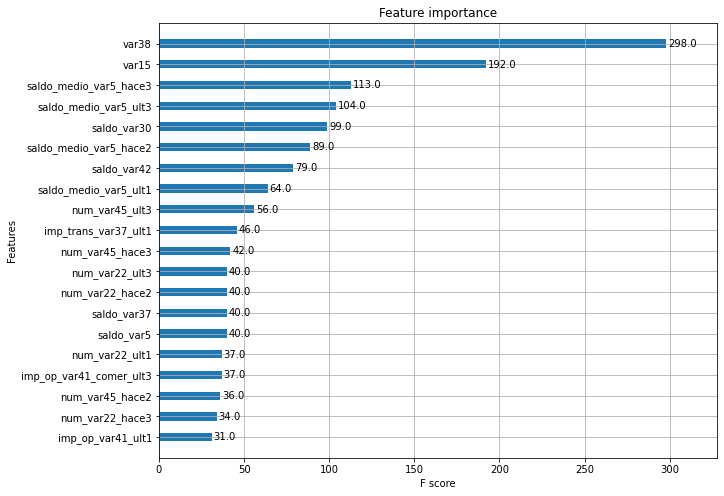

In [18]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)

### LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [ ]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

eval_set=[(X_tr, y_tr), (X_val, y_val)]
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric="auc", eval_set=eval_set)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

In [ ]:
lgbm_search_space = {'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
                     'max_depth': hp.quniform('max_depth', 100, 160, 1),
                     'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
                     'subsample': hp.uniform('subsample', 0.7, 1),
                     'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
                    }

In [ ]:
def objective_func(search_space):
    lgbm_clf =  LGBMClassifier(n_estimators=100, num_leaves=int(search_space['num_leaves']),
                               max_depth=int(search_space['max_depth']),
                               min_child_samples=int(search_space['min_child_samples']), 
                               subsample=search_space['subsample'],
                               learning_rate=search_space['learning_rate'])
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list = []
    
    # 3개 k-fold방식 적용 
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행. 
        lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_tr, y_tr), (X_val, y_val)])

        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음.
        score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:, 1]) 
        roc_auc_list.append(score)
    
    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환.
    return -1*np.mean(roc_auc_list)

In [ ]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출. 
best = fmin(fn=objective_func, space=lgbm_search_space, algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trials, rstate=np.random.default_rng(seed=30))

print('best:', best)

In [ ]:
lgbm_clf =  LGBMClassifier(n_estimators=500, num_leaves=int(best['num_leaves']),
                           max_depth=int(best['max_depth']),
                           min_child_samples=int(best['min_child_samples']), 
                           subsample=round(best['subsample'], 5),
                           learning_rate=round(best['learning_rate'], 5)
                          )

# evaluation metric을 auc로, early stopping은 100 으로 설정하고 학습 수행. 
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100, 
            eval_metric="auc",eval_set=[(X_tr, y_tr), (X_val, y_val)])

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))